<a href="https://colab.research.google.com/github/rootDevOps/coderhouse_data_science/blob/main/ProyectoDS_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Used Cars**

---



## **Abstract**

---

Actualmente el uso del automóvil se a vuelto importante para la vida cotidiana y laboral; por tal motivo se requiere conocer en qué momento y en que circunstancias es viable comprar un automóvil para cuidar la salud financiera de las personas. 

Precisamente hacia esta directriz está encaminado el presente estudio. El estudio muestra el comportamiento de los precios a lo largo de los últimos años, considerando factores como: modelo, fabricante, año, etc. para conocer a fondo la toma de decisiones de este caso de estudio.

En este proyecto se tratará de predecir el precio del próximo año 2023 en base a los datos obtenidos en el dataset.

Es importante mencionar que los datos obtenidos del dataset son de Estados Unidos de America.

## **Proyecto DS**
---



## **1.- Definir el Objetivo**
Diseñar un sistema que permita predecir el precio de un modelo de automóvil en el próximo año 2023.

## **2.- Contexto Comercial**

Actualmente el uso del automóvil se ha vuelto importante para la vida cotidiana y laboral; por tal motivo se requiere conocer en qué momento y en que circunstancias es viable comprar un automóvil para cuidar la salud financiera de las personas. 

Precisamente hacia esta directriz está encaminado el presente estudio. El estudio muestra el comportamiento de los precios a lo largo de los últimos años, considerando factores como: modelo, fabricante, año, etc. para conocer a fondo la toma de decisiones de este caso de estudio.

## **3.- Problema Comercial**

* ¿Cuál será el precio de un modelo de automóvil en el año 2023?

## **4.- Data Acquisition**
Los datos adquiridos son recopilación tipo **Third-Party Data** porque provienen de un website llamada kaggle, es una fuente de datos externa.

#### 4.1 Dataset - Used Cars
> 
> - enlace: https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data
>
> - columnas: 25
>
> - renglones: 426,881
>
> - tamaño: 1.45Gb

> ### Tipo de columnas - Diccionario de datos
>
> - **id**: [INT] autoincrement
> - **url**: [STRING] URL del website	
> - **region**: [STRING] Region de la venta	
> - **region_url**: [STRING] Website de la venta	
> - **price**: [INT] Precio del automóvil usado	
> - **year**: [INT] Año de la venta	
> - **manufacturer**: [STRING] Fabricante 	
> - **model**: [STRING] Modelo	
> - **condition**: [STRING] Condición: Excellent, fair, good and new	
> - **cylinders**: [STRING] Números de cilindros	
> - **fuel**: [STRING] Gasolina: Diesel, electric, gas and hybrid	
> - **odometer**:	[INT] Odometro
> - **title_status**: [STRING] Estatus del automóvil: Clean, lien, missing, part only	
> - **transmission**: [STRING] Transmición: Automatic or manual	
> - **VIN**: [STRING] VIN
> - **drive**: [STRING] 4wd, fwd, rwd	
> - **size**: [STRING] Tamaño: Compact, Full-size, mid-size, sub-compact	
> - **type**: [STRING] Tipo: bus, pickup, van, etc	
> - **paint_color**: [STRING] Color	
> - **image_url**: [STRING] URL de la imagen	
> - **description**: [STRING] Descripción	
> - **county**: [STRING] País	
> - **state**: [STRING] Estado
> - **lat**: [STRING] Latitud
> - **long**:	[STRING] Longitud
> - **posting_date**: [STRING] Fecha de registro


## **5.- Exploratory Data**

> Instalar librerías necesarias para el primer análisis.

In [177]:
#librerías generales
import os
from timeit import default_timer as timer
import datetime

#librería numpy
%pip install scipy
import scipy
import numpy as np

#librería pandas
import pandas as pd 

#librería matplotlib
import matplotlib.pyplot as plt

#librería seaborn
import seaborn as sns

from sklearn.model_selection import cross_val_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.9 MB 4.9 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5


> Montar el drive de google.

In [178]:
from google.colab import drive
drive.mount('/content/drive')

# Nos posicionamos en la ruta correcta
%cd /content/drive/MyDrive/Cursos/Courses - CoderHouse/Data Science/Proyecto/input/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Cursos/Courses - CoderHouse/Data Science/Proyecto/input


> Cargar archivo CSV y asignarlo a un Dataframe.

In [179]:
df = pd.read_csv('./vehicles.csv', delimiter=',')
df.dataframeName = 'vehicles'

# Devuelve las 5 primeras filas del DataFrame definido como df
df.head()

id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   

                   region                         region_url  price  year  \
0                prescott    https://prescott.craigslist.org   6000   NaN   
1            fayetteville       https://fayar.craigslist.org  11900   NaN   
2            florida keys        https://keys.craigslist.org  21000   NaN   
3  worcester / central MA   https://worcester.craigslist.org   1500   NaN   
4              greensboro  https://greensboro.craigslist.org   4900   NaN   

  manufacturer model condition cylinders  ... size  type paint_color  \
0          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
1          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
2          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
3          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
4          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   

  image_url description county state lat long posting_date  
0       NaN         NaN    NaN    az NaN  NaN          NaN  
1       NaN         NaN    NaN    ar NaN  NaN          NaN  
2       NaN         NaN    NaN    fl NaN  NaN          NaN  
3       NaN         NaN    NaN    ma NaN  NaN          NaN  
4       NaN         NaN    NaN    nc NaN  NaN          NaN  

[5 rows x 26 columns]

> Devuelve una tupla con el número de filas y columnas del DataFrame df.

In [180]:
df.shape

(426880, 26)

**Conclusión**: contiene 426,880 filas y 26 columnas el dataset

> Devuelve información (número de filas, número de columnas, índices, tipo de las columnas y memoria usado) sobre el DataFrame df.

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

> Mostrar la suma de las columnas null or NA del dataset.

In [182]:
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

**Conclusión**: Podemos observar que las mayoria de las columnas tienen datos null.

## **6.- Data Wrangling**

> Validar si existen datos duplicados.

In [183]:
# Referencia: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
df.duplicated().value_counts()

False    426880
dtype: int64

**Conclusión**: Determinamos que no existen renglones o registros duplicados.

Nota: En caso de que existierán duplicados, se podrá usar: df.drop_duplicates(inplace=True)

> Mostrar datos con valores NAN (missing values).

In [184]:
# Referencia: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html
df.isna().sum().to_frame()

0
id                 0
url                0
region             0
region_url         0
price              0
year            1205
manufacturer   17646
model           5277
condition     174104
cylinders     177678
fuel            3013
odometer        4400
title_status    8242
transmission    2556
VIN           161042
drive         130567
size          306361
type           92858
paint_color   130203
image_url         68
description       70
county        426880
state              0
lat             6549
long            6549
posting_date      68

> Corroborar los datos NULL con otro método similar al anterior.

In [185]:
# Referencia: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html
df.isnull().sum().to_frame()

0
id                 0
url                0
region             0
region_url         0
price              0
year            1205
manufacturer   17646
model           5277
condition     174104
cylinders     177678
fuel            3013
odometer        4400
title_status    8242
transmission    2556
VIN           161042
drive         130567
size          306361
type           92858
paint_color   130203
image_url         68
description       70
county        426880
state              0
lat             6549
long            6549
posting_date      68

> Mostrar en forma gráfica los missing values.

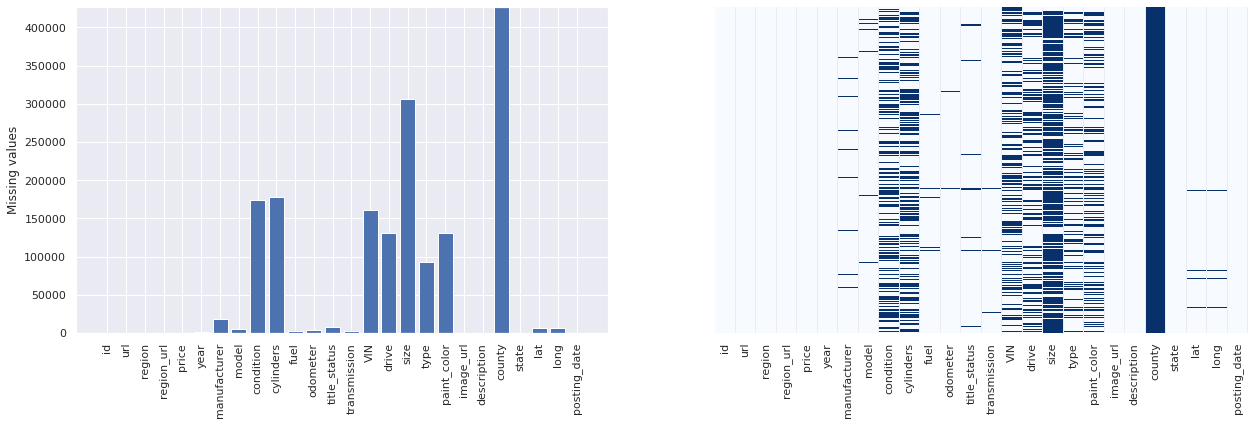

In [186]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (21, 6))

ax1.bar(df.columns, df.isna().sum())
ax1.set_ylabel('Missing values')
ax1.set_ylim(0, df.shape[0])
ax1.tick_params('x', labelrotation = 90)

sns.heatmap(df.isna(), yticklabels = False, cbar = False, cmap = 'Blues', ax = ax2)
plt.show()

**Conclusión**: Se validó cuantos valores nulos existen en el dataset con isna() y isnull(). Podemos observar que el campo 'price' no contiene valores nulos, lo que nos indica que tiene valores consistentes. Se eliminará los registros que tengan NAN en el campo Year debido a que este campo debería de estar con información para que sea útil para el análisis.

Podemos observar que las columnas con mayor missing Values son: condition cylinders, VIN, drive, size, type, paint_color y country.

La única columna que se eliminará porque se encuentra vacía es: county.

> Crear un dataframe temporal para el análisis.

In [187]:
df_clean = df.copy()
df_clean.head()

id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   

                   region                         region_url  price  year  \
0                prescott    https://prescott.craigslist.org   6000   NaN   
1            fayetteville       https://fayar.craigslist.org  11900   NaN   
2            florida keys        https://keys.craigslist.org  21000   NaN   
3  worcester / central MA   https://worcester.craigslist.org   1500   NaN   
4              greensboro  https://greensboro.craigslist.org   4900   NaN   

  manufacturer model condition cylinders  ... size  type paint_color  \
0          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
1          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
2          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
3          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
4          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   

  image_url description county state lat long posting_date  
0       NaN         NaN    NaN    az NaN  NaN          NaN  
1       NaN         NaN    NaN    ar NaN  NaN          NaN  
2       NaN         NaN    NaN    fl NaN  NaN          NaN  
3       NaN         NaN    NaN    ma NaN  NaN          NaN  
4       NaN         NaN    NaN    nc NaN  NaN          NaN  

[5 rows x 26 columns]

> Eliminar los missing rows.

In [188]:
df_clean.dropna(subset=['year','model','fuel','odometer','transmission'], axis = 0, inplace = True)
df_clean.shape

(412372, 26)

In [189]:
df_clean.dropna(subset=['manufacturer', 'condition', 'cylinders', 'title_status', 'drive', 'type', 'paint_color', 'lat', 'long'], axis = 0, how = 'all', inplace = True)
df_clean.shape

(412372, 26)

In [190]:
df_clean.dropna(subset=['manufacturer', 'condition', 'cylinders', 'title_status', 'drive', 'type', 'paint_color', 'lat', 'long'], axis=0, thresh=7, inplace=True)
df_clean.shape

(302583, 26)

> Eliminar la columna 'country' porque esta vacía.

In [191]:
df_clean.drop(['county'], axis = 1, inplace = True)

> Eliminar los valores de 'year' inferiores a 0 del DataFrame temporal.

In [192]:
df_clean = df_clean[df_clean['year'] > 0]

In [193]:
df_clean.head()

id                                                url  region  \
27  7316814884  https://auburn.craigslist.org/ctd/d/auburn-uni...  auburn   
28  7316814758  https://auburn.craigslist.org/ctd/d/auburn-uni...  auburn   
29  7316814989  https://auburn.craigslist.org/ctd/d/auburn-uni...  auburn   
30  7316743432  https://auburn.craigslist.org/ctd/d/auburn-uni...  auburn   
31  7316356412  https://auburn.craigslist.org/cto/d/auburn-uni...  auburn   

                       region_url  price    year manufacturer  \
27  https://auburn.craigslist.org  33590  2014.0          gmc   
28  https://auburn.craigslist.org  22590  2010.0    chevrolet   
29  https://auburn.craigslist.org  39590  2020.0    chevrolet   
30  https://auburn.craigslist.org  30990  2017.0       toyota   
31  https://auburn.craigslist.org  15000  2013.0         ford   

                       model  condition    cylinders  ... drive       size  \
27  sierra 1500 crew cab slt       good  8 cylinders  ...   NaN        NaN   
28            silverado 1500       good  8 cylinders  ...   NaN        NaN   
29       silverado 1500 crew       good  8 cylinders  ...   NaN        NaN   
30      tundra double cab sr       good  8 cylinders  ...   NaN        NaN   
31                 f-150 xlt  excellent  6 cylinders  ...   rwd  full-size   

      type paint_color                                          image_url  \
27  pickup       white  https://images.craigslist.org/00R0R_lwWjXSEWNa...   
28  pickup        blue  https://images.craigslist.org/00R0R_lwWjXSEWNa...   
29  pickup         red  https://images.craigslist.org/01212_jjirIWa0y0...   
30  pickup         red  https://images.craigslist.org/00x0x_1y9kIOzGCF...   
31   truck       black  https://images.craigslist.org/00404_l4loxHvdQe...   

                                          description state     lat     long  \
27  Carvana is the safer way to buy a car During t...    al  32.590 -85.4800   
28  Carvana is the safer way to buy a car During t...    al  32.590 -85.4800   
29  Carvana is the safer way to buy a car During t...    al  32.590 -85.4800   
30  Carvana is the safer way to buy a car During t...    al  32.590 -85.4800   
31  2013 F-150 XLT V6 4 Door. Good condition. Leve...    al  32.592 -85.5189   

                posting_date  
27  2021-05-04T12:31:18-0500  
28  2021-05-04T12:31:08-0500  
29  2021-05-04T12:31:25-0500  
30  2021-05-04T10:41:31-0500  
31  2021-05-03T14:02:03-0500  

[5 rows x 25 columns]

> Analizar la columna posting_date para tranformarla al formato correcto.

In [194]:
df_clean.posting_date

27        2021-05-04T12:31:18-0500
28        2021-05-04T12:31:08-0500
29        2021-05-04T12:31:25-0500
30        2021-05-04T10:41:31-0500
31        2021-05-03T14:02:03-0500
                    ...           
426875    2021-04-04T03:21:31-0600
426876    2021-04-04T03:21:29-0600
426877    2021-04-04T03:21:17-0600
426878    2021-04-04T03:21:11-0600
426879    2021-04-04T03:21:07-0600
Name: posting_date, Length: 302583, dtype: object

> Agregar una nueva columna para obtener el formato de la columna 'posting_date' con el formato '%B-%d'.

In [195]:
df_clean = df_clean.dropna(subset = ['posting_date'], axis = 0)
df_clean['posting_date_format'] = pd.to_datetime(df_clean['posting_date'], utc = True).apply(lambda x: x.strftime('%B-%d') if not pd.isnull(x) else '')
df_clean['posting_date_format']

27          May-04
28          May-04
29          May-04
30          May-04
31          May-03
            ...   
426875    April-04
426876    April-04
426877    April-04
426878    April-04
426879    April-04
Name: posting_date_format, Length: 302583, dtype: object

> Analizar los datos de LAT y LONG para observar si el Dataset solo contiene datos de Estados Unidos de América.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


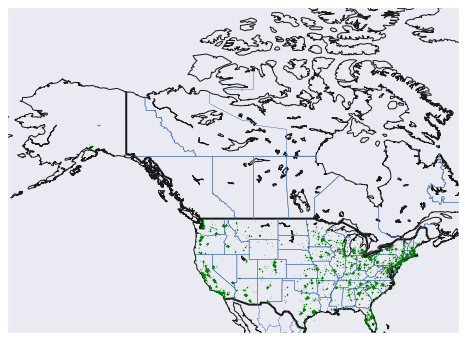

In [196]:
!pip install basemap
from mpl_toolkits.basemap import Basemap 
df_shuffled = df_clean.sample(frac=1) 
df_shuffled.head()
plt.figure(figsize=(12,6)) 
map = Basemap(projection='mill',llcrnrlat = 25,llcrnrlon = -170,urcrnrlat = 80,
            urcrnrlon = -60,
            resolution='l')
map.drawcoastlines()
map.drawcountries(linewidth=2)
map.drawstates(color='b')
i = 0
for index, row in df_shuffled.iterrows():
    lat = row['lat']
    lon = row['long']
    xpt, ypt = map(lon, lat)
    map.plot(xpt,ypt,'.',markersize=0.2,c="green")
    # stopping criteria
    i = i + 1
    if (i == 15000): break

**Conclusión**: Observamos que la información obtenida del DataFrame si es correspondiente a Estados Unidos de América

> Explorar los datos para validar su información y almacenarla en una variable temporal para no perder el dataframe original.

In [197]:
df2 = df_clean.copy()
df2[['id', 'url', 'region_url', 'VIN', 'image_url', 'description', 'lat', 'long', 'posting_date', 'size', 'posting_date_format']]

id                                                url  \
27      7316814884  https://auburn.craigslist.org/ctd/d/auburn-uni...   
28      7316814758  https://auburn.craigslist.org/ctd/d/auburn-uni...   
29      7316814989  https://auburn.craigslist.org/ctd/d/auburn-uni...   
30      7316743432  https://auburn.craigslist.org/ctd/d/auburn-uni...   
31      7316356412  https://auburn.craigslist.org/cto/d/auburn-uni...   
...            ...                                                ...   
426875  7301591192  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426876  7301591187  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426877  7301591147  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426878  7301591140  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426879  7301591129  https://wyoming.craigslist.org/ctd/d/atlanta-2...   

                            region_url                VIN  \
27       https://auburn.craigslist.org  3GTP1VEC4EG551563   
28       https://auburn.craigslist.org  1GCSCSE06AZ123805   
29       https://auburn.craigslist.org  3GCPWCED5LG130317   
30       https://auburn.craigslist.org  5TFRM5F17HX120972   
31       https://auburn.craigslist.org                NaN   
...                                ...                ...   
426875  https://wyoming.craigslist.org  1N4AA6AV6KC367801   
426876  https://wyoming.craigslist.org  7JR102FKXLG042696   
426877  https://wyoming.craigslist.org  1GYFZFR46LF088296   
426878  https://wyoming.craigslist.org  58ABK1GG4JU103853   
426879  https://wyoming.craigslist.org  WBA4J1C58KBM14708   

                                                image_url  \
27      https://images.craigslist.org/00R0R_lwWjXSEWNa...   
28      https://images.craigslist.org/00R0R_lwWjXSEWNa...   
29      https://images.craigslist.org/01212_jjirIWa0y0...   
30      https://images.craigslist.org/00x0x_1y9kIOzGCF...   
31      https://images.craigslist.org/00404_l4loxHvdQe...   
...                                                   ...   
426875  https://images.craigslist.org/00o0o_iiraFnHg8q...   
426876  https://images.craigslist.org/00x0x_15sbgnxCIS...   
426877  https://images.craigslist.org/00L0L_farM7bxnxR...   
426878  https://images.craigslist.org/00z0z_bKnIVGLkDT...   
426879  https://images.craigslist.org/00Y0Y_lEUocjyRxa...   

                                              description        lat  \
27      Carvana is the safer way to buy a car During t...  32.590000   
28      Carvana is the safer way to buy a car During t...  32.590000   
29      Carvana is the safer way to buy a car During t...  32.590000   
30      Carvana is the safer way to buy a car During t...  32.590000   
31      2013 F-150 XLT V6 4 Door. Good condition. Leve...  32.592000   
...                                                   ...        ...   
426875  Carvana is the safer way to buy a car During t...  33.786500   
426876  Carvana is the safer way to buy a car During t...  33.786500   
426877  Carvana is the safer way to buy a car During t...  33.779214   
426878  Carvana is the safer way to buy a car During t...  33.786500   
426879  Carvana is the safer way to buy a car During t...  33.779214   

             long              posting_date       size posting_date_format  
27     -85.480000  2021-05-04T12:31:18-0500        NaN              May-04  
28     -85.480000  2021-05-04T12:31:08-0500        NaN              May-04  
29     -85.480000  2021-05-04T12:31:25-0500        NaN              May-04  
30     -85.480000  2021-05-04T10:41:31-0500        NaN              May-04  
31     -85.518900  2021-05-03T14:02:03-0500  full-size              May-03  
...           ...                       ...        ...                 ...  
426875 -84.445400  2021-04-04T03:21:31-0600        NaN            April-04  
426876 -84.445400  2021-04-04T03:21:29-0600        NaN            April-04  
426877 -84.411811  2021-04-04T03:21:17-0600        NaN            April-04  
426878 -84.445400  2021-04-04T03:21:11

**Conclusión**: 

*   id: contiene un número consecutivo del registro, no es necesario para esté análisis
*   url: contiene la url del post donde se publicó  la información del automóvil
*   region_url:: Dominio de la url de la publicación
*   VIN: ID del número del automóvil
*   image_url: Url de la imagen del automóvil
*   description: Descripción de la publicación
*   lat: Latitud de la publicación
*   long: Longitud de la publicación
*   posting_date: Fecha de la publicación en string
*   size: Tamaño del automóvil

Los campos anteriores no son aptos para predecir a primera instancia el precio de un automóvil, en la etapa de EDA podemos obtener el análisis de las demás columnas y si son necesaria eliminarlas.

> Eliminar las columnas de acuerdo al análisis anterior no son aptas para el análisis.

In [198]:
df2.drop(['id', 'url', 'region_url', 'VIN', 'image_url', 'description', 'lat', 'long', 'posting_date', 'size', 'region', 'posting_date', 'posting_date_format'], axis=1, inplace=True)

> Validar la eliminación de las columnas 'id', 'url', 'region_url', 'VIN', 'image_url', 'description', 'county', 'lat', 'long', 'posting_date', 'size', 'region', 'posting_date' y 'posting_date_format'.

In [199]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302583 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         302583 non-null  int64  
 1   year          302583 non-null  float64
 2   manufacturer  294379 non-null  object 
 3   model         302583 non-null  object 
 4   condition     225772 non-null  object 
 5   cylinders     225260 non-null  object 
 6   fuel          302583 non-null  object 
 7   odometer      302583 non-null  float64
 8   title_status  300050 non-null  object 
 9   transmission  302583 non-null  object 
 10  drive         259950 non-null  object 
 11  type          282675 non-null  object 
 12  paint_color   258656 non-null  object 
 13  state         302583 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 34.6+ MB


> Obtener una copia del dataframe para un análisis posterior

In [200]:
df_original = df.copy()
df_clean
df = df2.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302583 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         302583 non-null  int64  
 1   year          302583 non-null  float64
 2   manufacturer  294379 non-null  object 
 3   model         302583 non-null  object 
 4   condition     225772 non-null  object 
 5   cylinders     225260 non-null  object 
 6   fuel          302583 non-null  object 
 7   odometer      302583 non-null  float64
 8   title_status  300050 non-null  object 
 9   transmission  302583 non-null  object 
 10  drive         259950 non-null  object 
 11  type          282675 non-null  object 
 12  paint_color   258656 non-null  object 
 13  state         302583 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 34.6+ MB


**Conclusión:** De acuerdo al análisis, a continuación se muestran las variables independientes y la variable dependiente.

#### **Dependiente**
* price: Cuantitativa continua

#### **Independiente**
* year: Cuantitativa discreta	
* manufacturer: Cualitativa nominal	
* model: Cualitativa nominal
* condition: Cualitativa ordinal	
* cylinders: Cualitativa nominal
* fuel: Cualitativa	nominal
* odometer: Cuantitativa continua	
* title_status: Cualitativa nominal	
* transmission: Cualitativa nominal	
* drive: Cualitativa nominal	
* size: Cualitativa nominal	
* type: Cualitativa nominal	
* paint_color: Cualitativa nominal	
* county: Cualitativa nominal	
* state: Cualitativa nominal

#### **Otro**
* id	
* url	
* region	
* region_url	
* VIN	
* image_url	
* description	
* lat
* long	
* posting_date

### 6.1.- Análisis exploratorio de datos (Exploratory Data Analysis)

---

#### 6.1.1 - Entender los outliers de cada conjunto de datos.


> Evitar warnings en las librerías

In [201]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

> Graficar las columnas para comprender los datos de las variables numéricas

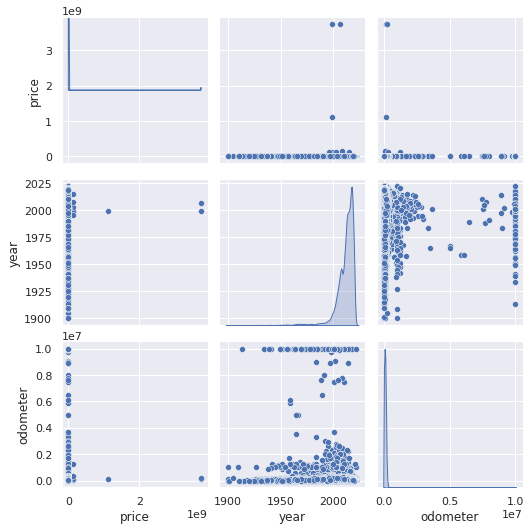

In [202]:
sns.pairplot(data = df, diag_kind = 'kde')

##### 6.1.1.1 Buscar outlier en las columnas numericas

#### **Valores más extremos (Outliers)**

Un valor más extremo (outlier) es un valor en un conjunto de datos que es muy diferente de los otros valores. Esto es, los outliers son valores excepcionalmente lejanos del centro.

En la mayoría de los casos, los outliers tienen influencia en la media , pero no en la mediana , o la moda . Por lo tanto, los outliers son importantes en su efecto en la media.

> Identificar los outlier de Price.

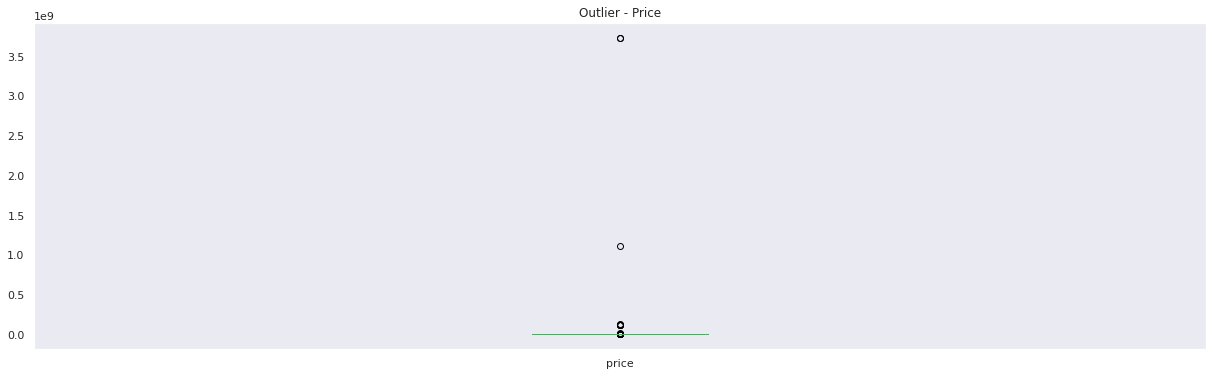

In [203]:
fig, ax = plt.subplots(figsize = (21,6))
df["price"].plot(kind = 'box')
plt.title('Outlier - Price')
plt.grid(False)

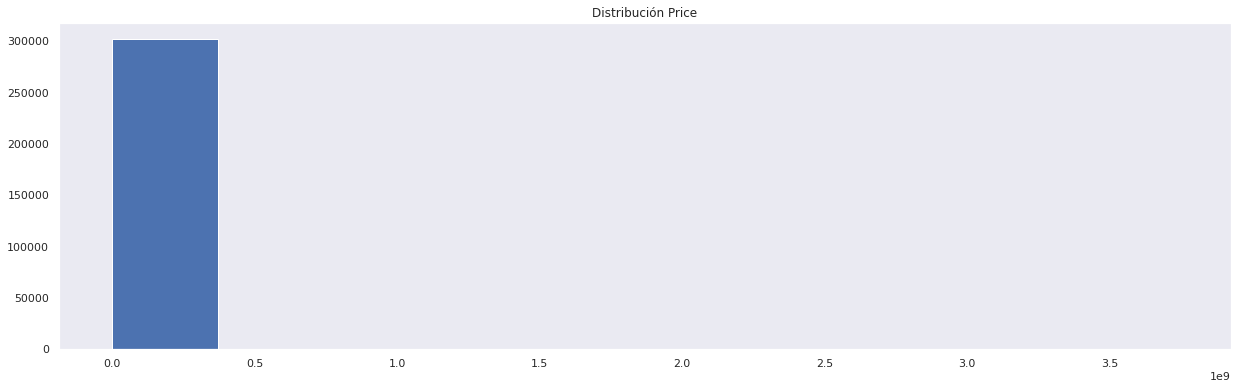

In [204]:
fig, ax = plt.subplots(figsize = (21,6))
df["price"].hist()
plt.title('Distribución Price')
plt.grid(False)

> Visualizar e identificar los outlier de Price & Condition.

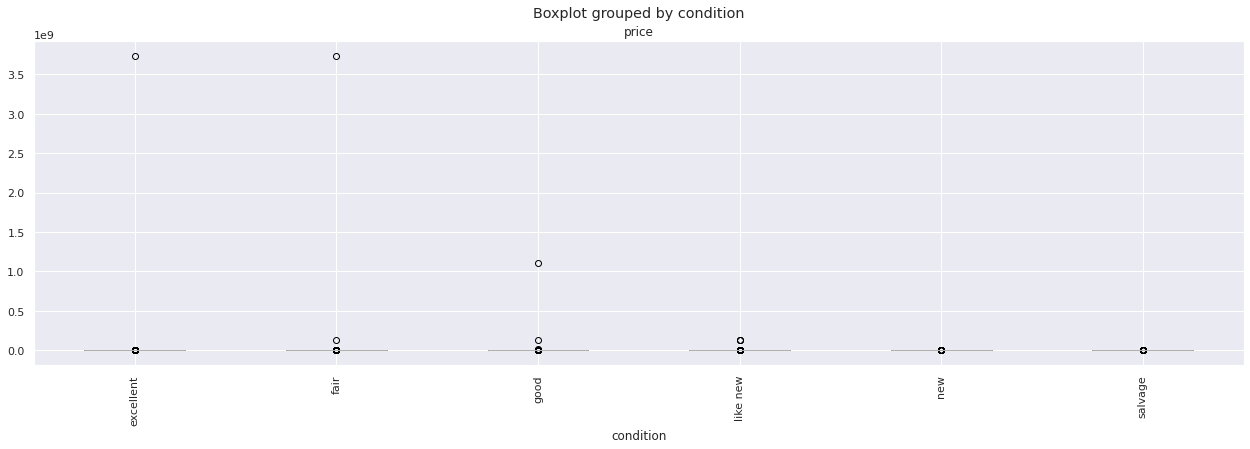

In [205]:
fig, ax = plt.subplots(1, 1, figsize = (21,6))
df.boxplot('price','condition', ax = ax)
plt.grid(True)
plt.xticks(rotation = 90)
plt.show()

**Conclusión**: Existen outliers en condition: excellent, fair & good.

> Visualizar e identificar los outlier de Price & Cylinders.

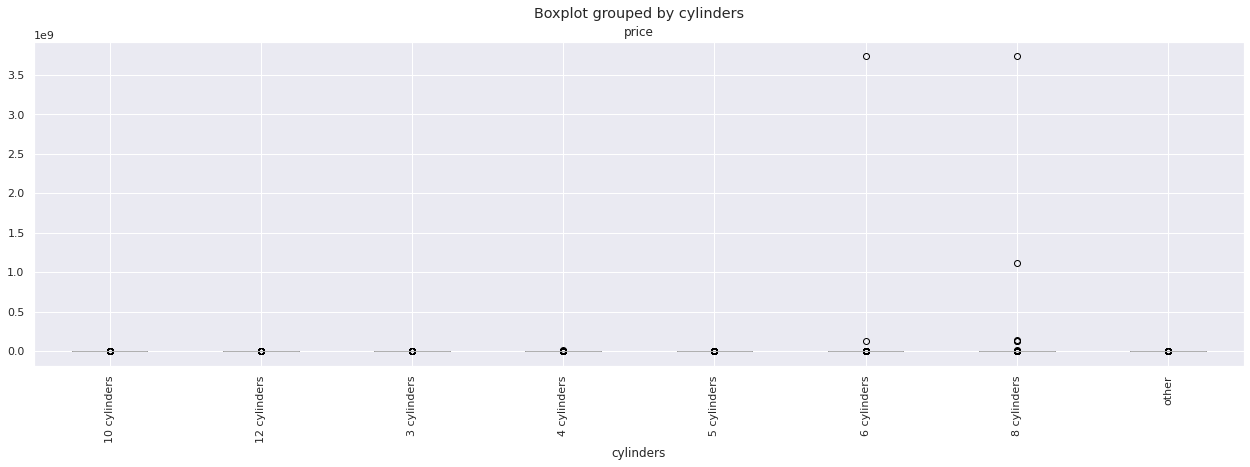

In [206]:
fig, ax = plt.subplots(1, 1, figsize = (21,6))
df.boxplot('price','cylinders',ax = ax)
plt.grid(True)
plt.xticks(rotation = 90)
plt.show()

**Conclusión**: Existen outliers en cylinders: 6 cylinders & 8 cylinders.

> Visualizar e identificar los outlier de Price & Fuel.

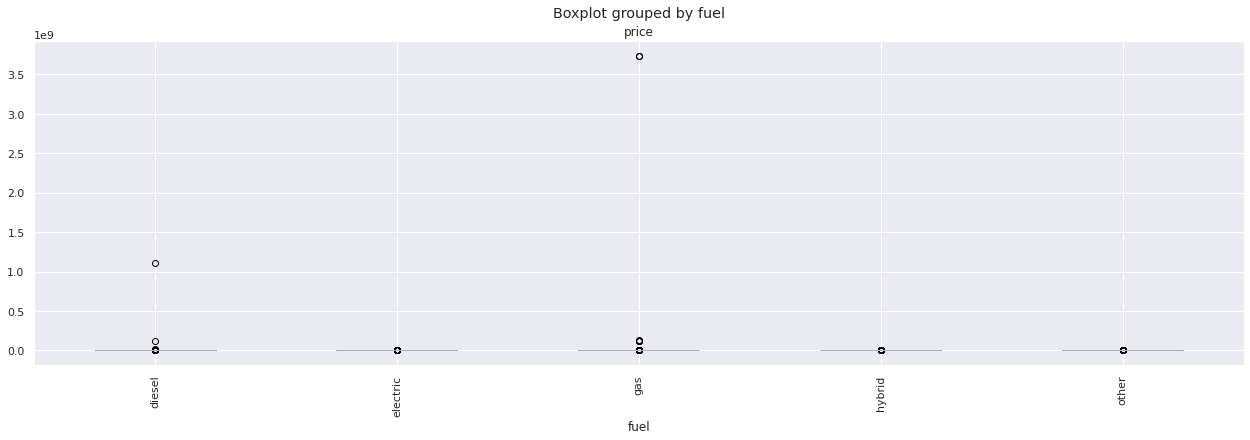

In [207]:
fig, ax = plt.subplots(1, 1, figsize = (21,6))
df.boxplot('price','fuel',ax=ax)
plt.grid(True)
plt.xticks(rotation = 90)
plt.show()

**Conclusión**: Existen outliers en fuel: gas.

> Visualizar e identificar los outlier de Price & Status.

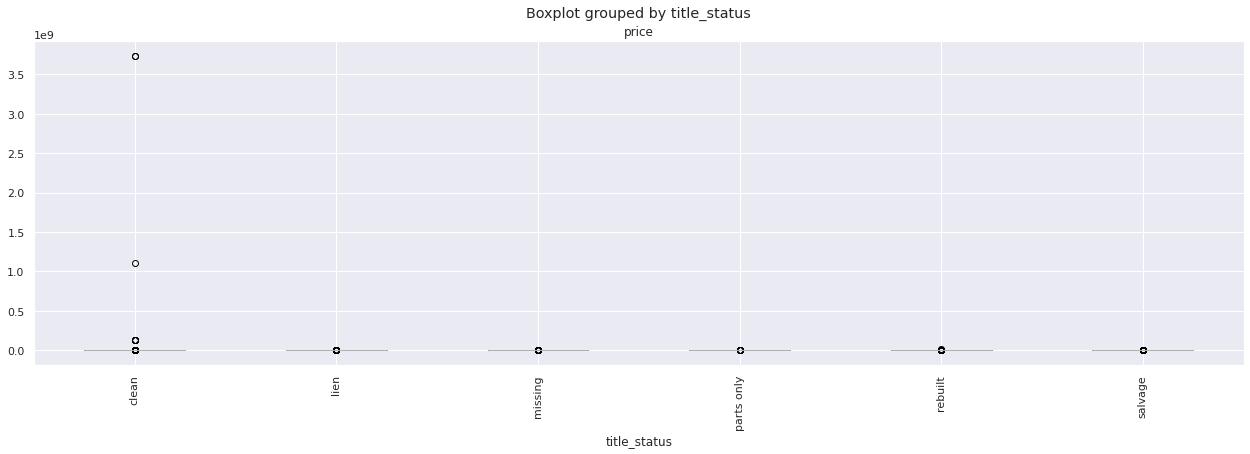

In [208]:
fig, ax = plt.subplots(1, 1, figsize = (21,6))
df.boxplot('price','title_status',ax = ax)
plt.grid(True)
plt.xticks(rotation = 90)
plt.show()

**Conclusión**: Existen outliers en status: clean.

> Visualizar e identificar los outlier de Price & Transmission.

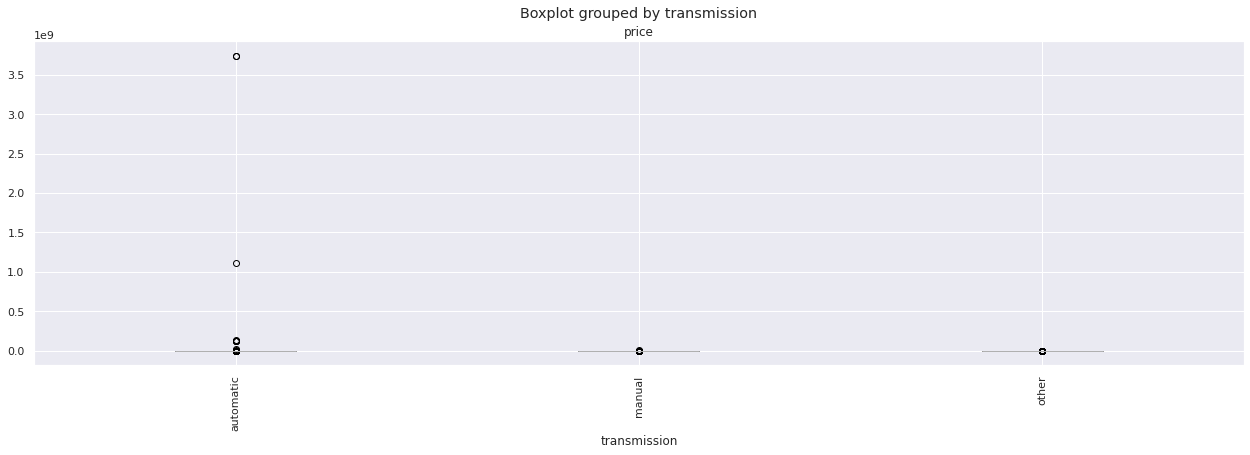

In [209]:
fig, ax = plt.subplots(1, 1, figsize = (21,6))
df.boxplot('price','transmission',ax = ax)
plt.grid(True)
plt.xticks(rotation = 90)
plt.show()

**Conclusión**: Existen outliers en transmission: automatic.


> Visualizar e identificar los outlier de Price & Drive.

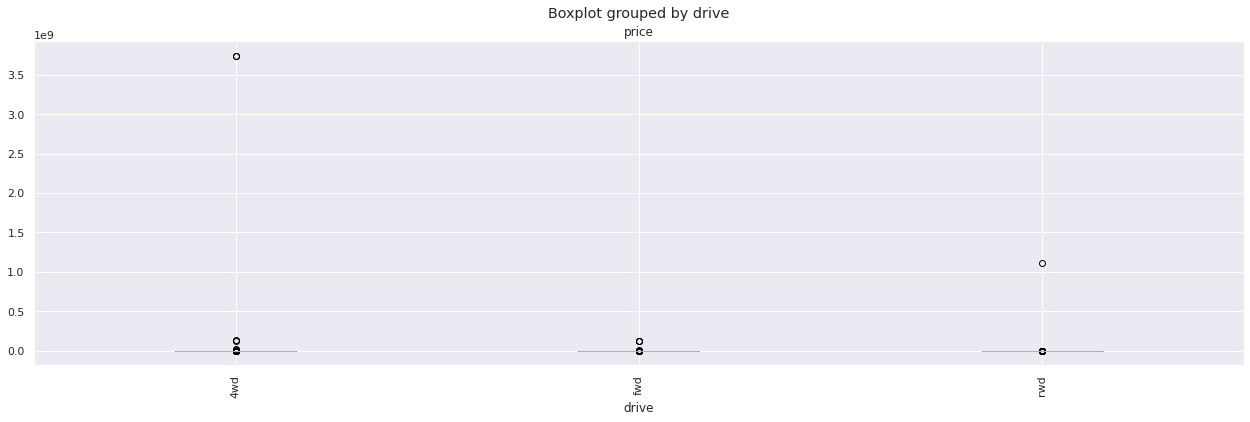

In [210]:
fig, ax = plt.subplots(1, 1, figsize = (21,6))
df.boxplot('price','drive',ax = ax)
plt.grid(True)
plt.xticks(rotation = 90)
plt.show()

**Conclusión**: Existen outliers en drive: 4wd.

> Visualizar e identificar los outlier de Price & Type.

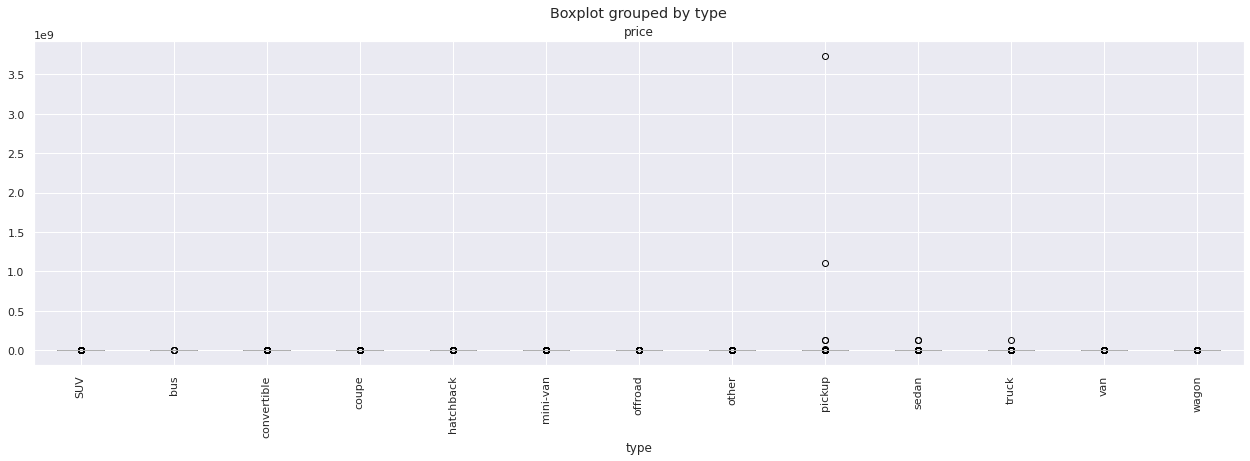

In [211]:

fig, ax = plt.subplots(1, 1, figsize = (21,6))
df.boxplot('price','type',ax = ax)
plt.grid(True)
plt.xticks(rotation = 90)
plt.show()

**Conclusión**: Existen outliers en type: SUV & Pickup.

> Visualizar e identificar los outlier de Price & Paint Color.

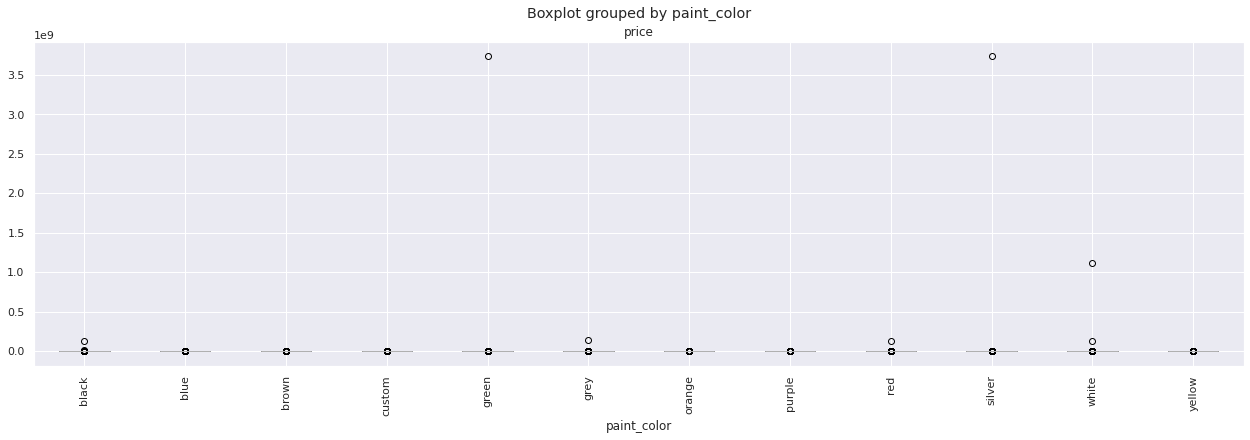

In [212]:
fig, ax = plt.subplots(1, 1, figsize = (21,6))
df.boxplot('price','paint_color',ax=ax)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

**Conclusión**: Existen outliers en color: blank, silver & green.

> Visualizar e identificar los outlier de Price & State.

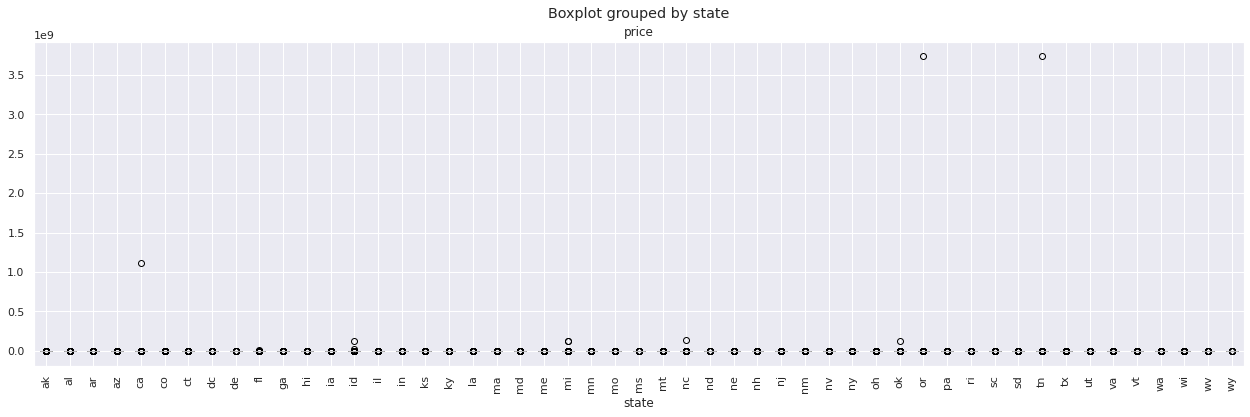

In [213]:
fig, ax = plt.subplots(1, 1, figsize = (21,6))
df.boxplot('price','state',ax = ax)
plt.grid(True)
plt.xticks(rotation = 90)
plt.show()

**Conclusión**: Existen outliers en state: CA, DE, NJ, OR & TN.

> Visualizar e identificar los outlier de Price & Manufacturer.

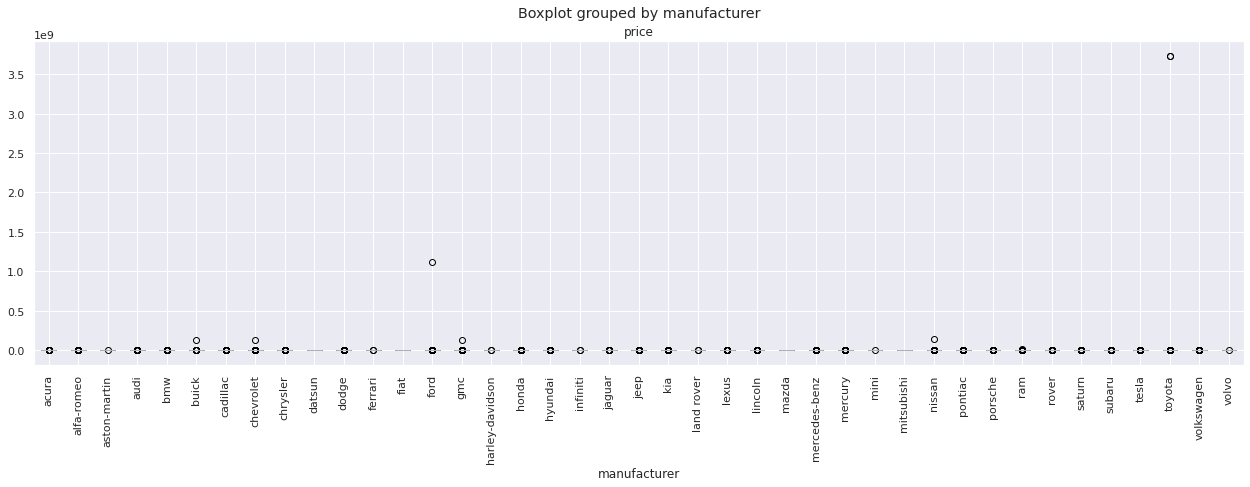

In [214]:
fig, ax = plt.subplots(1, 1, figsize = (21,6))
df.boxplot('price','manufacturer',ax = ax)
plt.grid(True)
plt.xticks(rotation = 90)
plt.show()

**Conclusión**: Se analizaron los siguientes campos: manufacturer, model,condition,cylinders,fuel,title_status,transmission,drive, size,type,paint_color,county,state.

Se observo que los precios outliers estan en: chevrolet, ford, jeep, mercedes, toyota y volvo con precios mayores a 100,000,000.00USD.

Nota: No se validó la columna 'model' porque tienes muchos valores únicos y excedió el tiempo de respuesta.

> Obtener el minimo y máximo de donde se concentran los precios

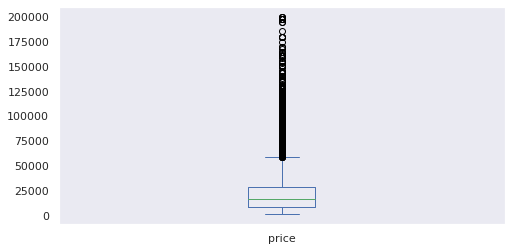

In [215]:
df1 = df.loc[(df.price >= 1_000) & (df.price <= 200_000)]
sns.set()
fig,(ax1)=plt.subplots(figsize=(8,4))
df1.price.plot(kind='box')
plt.grid(False)

> Obtener el rango donde se concentran el mayor número; para este análisis será necesario obtener el 1er & 3er cuartil 

In [216]:
df_clean = df[df['price'] > 0]
y = df_clean['price']

print("Precio mínimo: {:.2f}, Precio máximo: {:.2f}".format(y.quantile(.05), y.quantile(.95)))

Precio mínimo: 2500.00, Precio máximo: 44512.00


In [217]:
df.head()

price    year manufacturer                     model  condition  \
27  33590  2014.0          gmc  sierra 1500 crew cab slt       good   
28  22590  2010.0    chevrolet            silverado 1500       good   
29  39590  2020.0    chevrolet       silverado 1500 crew       good   
30  30990  2017.0       toyota      tundra double cab sr       good   
31  15000  2013.0         ford                 f-150 xlt  excellent   

      cylinders fuel  odometer title_status transmission drive    type  \
27  8 cylinders  gas   57923.0        clean        other   NaN  pickup   
28  8 cylinders  gas   71229.0        clean        other   NaN  pickup   
29  8 cylinders  gas   19160.0        clean        other   NaN  pickup   
30  8 cylinders  gas   41124.0        clean        other   NaN  pickup   
31  6 cylinders  gas  128000.0        clean    automatic   rwd   truck   

   paint_color state  
27       white    al  
28        blue    al  
29         red    al  
30         red    al  
31       black    al

> Visualizar la información del 1er y 3er cuartil

In [218]:
df.loc[((df["price"] > y.quantile(.05)) & (df["price"] < y.quantile(.95)))]

price    year manufacturer                     model  condition  \
27      33590  2014.0          gmc  sierra 1500 crew cab slt       good   
28      22590  2010.0    chevrolet            silverado 1500       good   
29      39590  2020.0    chevrolet       silverado 1500 crew       good   
30      30990  2017.0       toyota      tundra double cab sr       good   
31      15000  2013.0         ford                 f-150 xlt  excellent   
...       ...     ...          ...                       ...        ...   
426875  23590  2019.0       nissan         maxima s sedan 4d       good   
426876  30590  2020.0        volvo  s60 t5 momentum sedan 4d       good   
426877  34990  2020.0     cadillac          xt4 sport suv 4d       good   
426878  28990  2018.0        lexus           es 350 sedan 4d       good   
426879  30590  2019.0          bmw  4 series 430i gran coupe       good   

          cylinders    fuel  odometer title_status transmission drive  \
27      8 cylinders     gas   57923.0        clean        other   NaN   
28      8 cylinders     gas   71229.0        clean        other   NaN   
29      8 cylinders     gas   19160.0        clean        other   NaN   
30      8 cylinders     gas   41124.0        clean        other   NaN   
31      6 cylinders     gas  128000.0        clean    automatic   rwd   
...             ...     ...       ...          ...          ...   ...   
426875  6 cylinders     gas   32226.0        clean        other   fwd   
426876          NaN     gas   12029.0        clean        other   fwd   
426877          NaN  diesel    4174.0        clean        other   NaN   
426878  6 cylinders     gas   30112.0        clean        other   fwd   
426879          NaN     gas   22716.0        clean        other   rwd   

             type paint_color state  
27         pickup       white    al  
28         pickup        blue    al  
29         pickup         red    al  
30         pickup         red    al  
31          truck       black    al  
...           ...         ...   ...  
426875      sedan         NaN    wy  
426876      sedan         red    wy  
426877  hatchback       white    wy  
426878      sedan      silver    wy  
426879      coupe         NaN    wy  

[254991 rows x 14 columns]

> Visualizar la información con precios superiores a $100,000.00

In [219]:
df.loc[df["price"] > 100000]

price    year manufacturer                     model  condition  \
1727    130000  2019.0    chevrolet                  corvette   like new   
2922    140000  2015.0         jeep                  renegade   like new   
4826    104900  2020.0          bmw                     m805i  excellent   
5003    145000  2014.0          NaN       freightliner m2 106   like new   
7109    116000  2019.0         ford  f350 diesels powerstroke   like new   
...        ...     ...          ...                       ...        ...   
415796  229500  2019.0          NaN          Lamborghini Urus        NaN   
419656  119900  2021.0    chevrolet                  corvette       good   
419756  119995  2004.0        acura                       nsx        NaN   
420693  125000  2014.0      porsche               911 turbo s  excellent   
424281  299500  2018.0          NaN     Lamborghini Aventador        NaN   

           cylinders    fuel  odometer title_status transmission drive   type  \
1727     8 cylinders     gas    5000.0        clean    automatic   rwd  coupe   
2922     6 cylinders     gas   49658.0      rebuilt        other   fwd    SUV   
4826     8 cylinders     gas    9000.0        clean    automatic   4wd  sedan   
5003     6 cylinders  diesel   17094.0        clean    automatic   4wd  truck   
7109     8 cylinders  diesel   24000.0         lien    automatic   4wd  truck   
...              ...     ...       ...          ...          ...   ...    ...   
415796   8 cylinders     gas   32922.0        clean    automatic   4wd    SUV   
419656   8 cylinders     gas     601.0        clean    automatic   rwd  coupe   
419756   6 cylinders     gas   16859.0        clean       manual   rwd  coupe   
420693   6 cylinders     gas   10100.0        clean       manual   4wd  coupe   
424281  12 cylinders     gas    3171.0      salvage    automatic   4wd  coupe   

       paint_color state  
1727          blue    al  
2922        yellow    al  
4826         black    al  
5003         black    ak  
7109         white    ak  
...            ...   ...  
415796       white    wi  
419656         red    wi  
419756       black    wi  
420693       black    wi  
424281        blue    wi  

[327 rows x 14 columns]

> Visualizar la información con precios superiores a $700,000.00

In [220]:
df.loc[df["price"] > 700000].sort_values(by=['price'], ascending=False)

price    year   manufacturer                    model  condition  \
318592  3736928711  2007.0         toyota                   tundra  excellent   
356716  3736928711  1999.0         toyota                  4runner       fair   
29386   1111111111  1999.0           ford   f350 super duty lariat       good   
230753   135008900  2008.0         nissan         titan se kingcab   like new   
137807   123456789  1999.0          buick                    regal   like new   
193736   123456789  2015.0      chevrolet                    cruze   like new   
207080   123456789  2003.0            NaN                Chevy/gmc       good   
307488   123456789  1996.0            gmc              sierra 2500       fair   
136516    17000000  2007.0            ram                     2500       good   
105843     6995495  2014.0          dodge                  journey        NaN   
327938     3226714  2002.0            NaN              any and all       fair   
68935      2000000  2002.0         saturn  l-series l200 4dr sedan       good   
155421     1234567  2006.0           jeep                 wrangler   like new   
194292     1234567  2010.0        lincoln             mkt ecoboost   like new   
219241     1111111  1970.0          dodge               challenger       fair   
95119       990000  2017.0  mercedes-benz                 amg g 63        NaN   

          cylinders    fuel   odometer title_status transmission drive  \
318592  8 cylinders     gas   164000.0        clean    automatic   4wd   
356716  6 cylinders     gas   211000.0        clean    automatic   4wd   
29386   8 cylinders  diesel   149000.0        clean    automatic   rwd   
230753  8 cylinders     gas   110500.0        clean    automatic   4wd   
137807  6 cylinders     gas    96000.0        clean    automatic   fwd   
193736          NaN     gas    64181.0        clean    automatic   fwd   
207080  8 cylinders  diesel  1234567.0        clean    automatic   fwd   
307488  8 cylinders     gas   320000.0        clean    automatic   4wd   
136516  8 cylinders  diesel   170000.0      rebuilt    automatic   4wd   
105843  4 cylinders     gas   135888.0        clean    automatic   fwd   
327938  8 cylinders  diesel     1234.0        clean       manual   4wd   
68935   4 cylinders     gas   164290.0        clean    automatic   fwd   
155421  6 cylinders     gas   123456.0        clean    automatic   4wd   
194292          NaN     gas    85653.0        clean    automatic   NaN   
219241  8 cylinders     gas    42000.0        clean    automatic   rwd   
95119   8 cylinders     gas     4085.0        clean    automatic   4wd   

          type paint_color state  
318592  pickup      silver    or  
356716     NaN       green    tn  
29386   pickup       white    ca  
230753   truck        grey    nc  
137807   sedan       white    id  
193736   sedan         red    mi  
207080  pickup         NaN    mi  
307488  pickup       black    ok  
136516  pickup       black    id  
105843     SUV         NaN    fl  
327938   sedan        blue    pa  
68935    sedan       green    ca  
155421     SUV      custom    in  
194292     SUV      custom    mi  
219241   coupe        blue    ms  
95119      SUV       white    fl

**Conclusión**: El análisis y visualización individual, se ocupará la mayor concentración de precios que se encuentra entre el 0.05Q y .95Q que corresponden $2,500.00 - $44,512.00; contemplando un máx. de $700,000.00 porque valores superiores a esté son outliers.

> Visualiza los missing values

In [221]:
df.isna().sum()

price               0
year                0
manufacturer     8204
model               0
condition       76811
cylinders       77323
fuel                0
odometer            0
title_status     2533
transmission        0
drive           42633
type            19908
paint_color     43927
state               0
dtype: int64

> Elimina los missing values de la columna manufacturer

In [222]:
df.dropna(subset=['manufacturer'],axis=0,inplace=True)

> Normalizar la columna de condition para el análisis.

In [223]:
cond_prob = pd.DataFrame(list(df["condition"].value_counts(normalize=True).items()),columns = ['condition','prob'])
cond_prob

condition      prob
0       good  0.497381
1  excellent  0.391267
2   like new  0.080465
3       fair  0.024635
4        new  0.004143
5    salvage  0.002110

> Sustituir los missing values

In [224]:
df.loc[df["condition"].isna(), 'condition'] = np.random.choice(cond_prob["condition"], size=df["condition"].isna().sum(), replace=True, p=cond_prob.prob)

> Normalizar la columna de cylinders de condition para el análisis.

In [225]:
cyl_prob = pd.DataFrame(list(df["cylinders"].value_counts(normalize=True).items()),columns = ['cylinders','prob'])
cyl_prob

cylinders      prob
0   6 cylinders  0.380944
1   4 cylinders  0.312470
2   8 cylinders  0.287699
3   5 cylinders  0.006773
4  10 cylinders  0.005793
5         other  0.003545
6   3 cylinders  0.002299
7  12 cylinders  0.000476

In [226]:
df.loc[df["cylinders"].isna(), 'cylinders'] = np.random.choice(cyl_prob["cylinders"], size=df["cylinders"].isna().sum(), replace=True, p=cyl_prob.prob)

> Normalizar la columna de title_status de condition para el análisis.

In [227]:
ts_prob = pd.DataFrame(list(df["title_status"].value_counts(normalize=True).items()),columns = ['ts','prob'])
ts_prob

ts      prob
0       clean  0.967133
1     rebuilt  0.018482
2     salvage  0.008940
3        lien  0.004054
4     missing  0.001107
5  parts only  0.000284

In [228]:
df.loc[df["title_status"].isna(), 'title_status'] = np.random.choice(ts_prob.ts, size=df["title_status"].isna().sum(), replace=True, p=ts_prob.prob)

> Normalizar la columna de drive de condition para el análisis.

In [229]:
dr_prob = pd.DataFrame(list(df["drive"].value_counts(normalize=True).items()),columns = ['drive','prob'])
dr_prob

drive      prob
0   4wd  0.444472
1   fwd  0.362269
2   rwd  0.193259

In [230]:
df.loc[df["drive"].isna(), 'drive'] = np.random.choice(dr_prob["drive"], size=df["drive"].isna().sum(), replace=True, p=dr_prob.prob)

> Normalizar la columna de title_status de condition para el análisis.


In [231]:
type_prob = pd.DataFrame(list(df["type"].value_counts(normalize=True).items()),columns = ['type','prob'])
type_prob

type      prob
0         sedan  0.260651
1           SUV  0.236407
2        pickup  0.136126
3         truck  0.112936
4         coupe  0.056421
5         other  0.053737
6     hatchback  0.048104
7         wagon  0.031445
8           van  0.024459
9   convertible  0.021735
10     mini-van  0.015062
11      offroad  0.001986
12          bus  0.000931

In [232]:
df.loc[df["type"].isna(), 'type'] = np.random.choice(type_prob["type"], size=df["type"].isna().sum(), replace=True, p=type_prob.prob)

> Normalizar la columna de paint_color de condition para el análisis.

In [233]:
pc_prob = pd.DataFrame(list(df["paint_color"].value_counts(normalize=True).items()),columns = ['color','prob'])
pc_prob

color      prob
0    white  0.258073
1    black  0.213919
2   silver  0.146036
3     blue  0.106004
4      red  0.102962
5     grey  0.087372
6    green  0.024063
7   custom  0.023509
8    brown  0.023206
9   orange  0.006407
10  yellow  0.006280
11  purple  0.002169

In [234]:
df.loc[df["paint_color"].isna(), 'paint_color'] = np.random.choice(pc_prob.color, size=df["paint_color"].isna().sum(), replace=True, p=pc_prob.prob)

> Validar que no existan missing values

In [235]:
df.isna().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

> Visualizar nuevo conjunto de datos

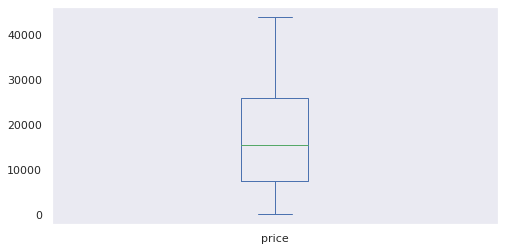

In [236]:
df_clean = df[df['price'] > 0]
y = df_clean['price']

df = df[(df['price'] >  0) & (df['price'] <  y.quantile(.95)) ]

sns.set()
fig,(ax1)=plt.subplots(figsize=(8,4))
df.price.plot(kind='box')
plt.grid(False)

#### 6.1.1 - Análisis univariado, bivariado y multivariado

> Visualizar e identificar los outlier de Price & Year.

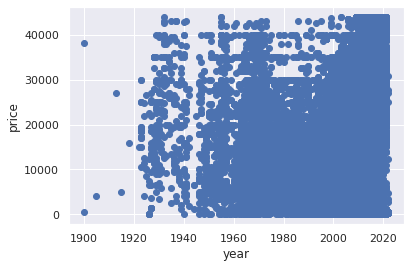

In [237]:
y = df['price']
x = df['year']
plt.scatter(x, y)
plt.xlabel('year')
plt.ylabel('price')
plt.show()

> Análisis de Price & Year.

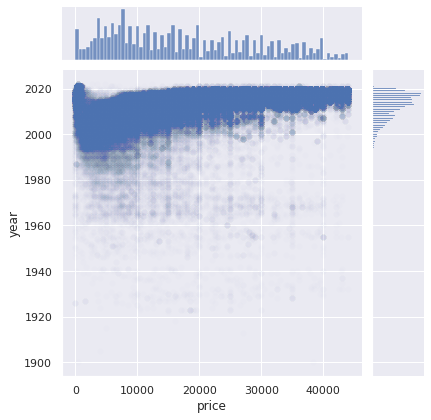

In [238]:
sns.jointplot(data=df, x='price', y='year', alpha=0.01, dropna=True)

**Conclusión**: Existe mayor concentración de automóviles en un rango de 0 < $10,000.00.

---

#### --- Condition

> Mostrar valores únicos de condition.

In [239]:
df["condition"].unique()

array(['good', 'excellent', 'fair', 'like new', 'new', 'salvage'],
      dtype=object)

> Graficar cantidad de automóviles de acuerdo al condition.

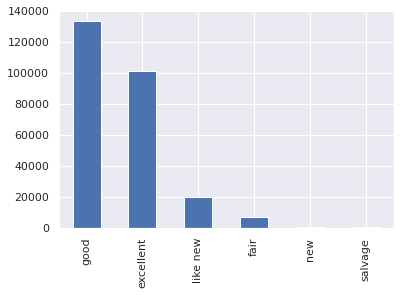

In [240]:
df['condition'].value_counts().plot.bar()

> Visualizar e identificar los outlier de Price & Condition después del primer análisis.

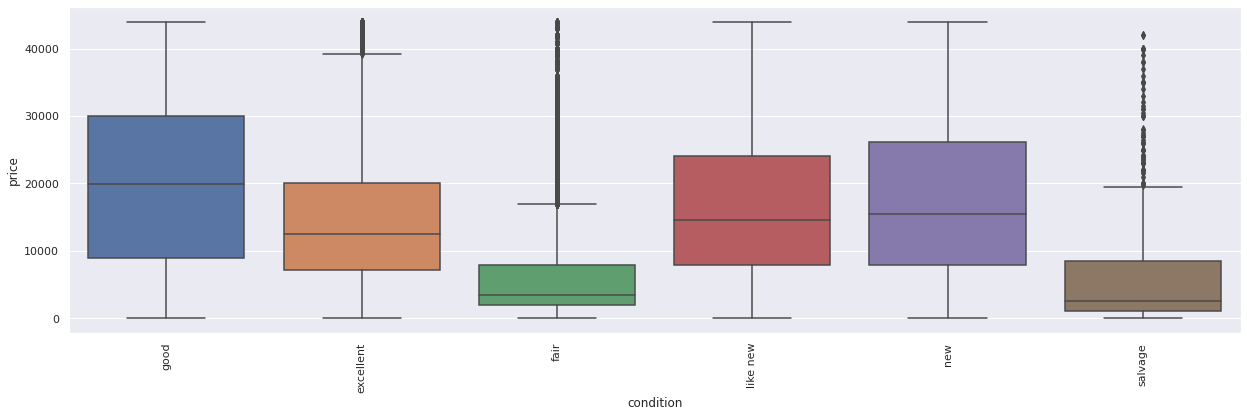

In [241]:
fig = plt.figure(figsize=(21,6))
sns.boxplot(data=df, x='condition', y='price')
plt.xticks(rotation=90)
plt.show()

> Análisis de Price & Condition.

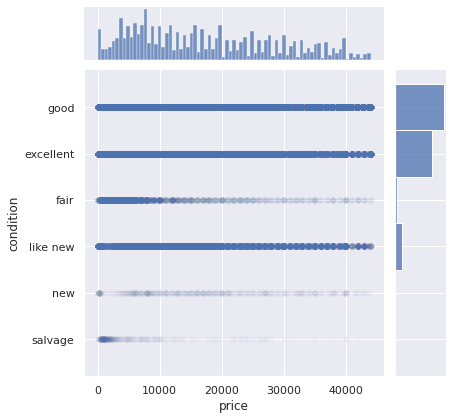

In [242]:
sns.jointplot(data=df, x='price', y='condition', alpha=0.01, dropna=True)

> Análisis de Price & Condition & Year.

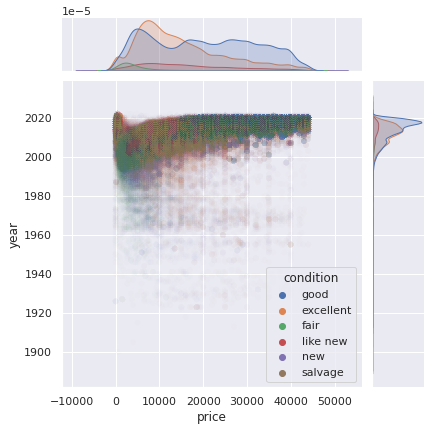

In [243]:
sns.jointplot(data=df, x='price', y='year', alpha=0.01, hue="condition")

**Conclusión**: La condición de un automóvil 'good' o 'buena' se encuentra presente en todo el rango de precios.

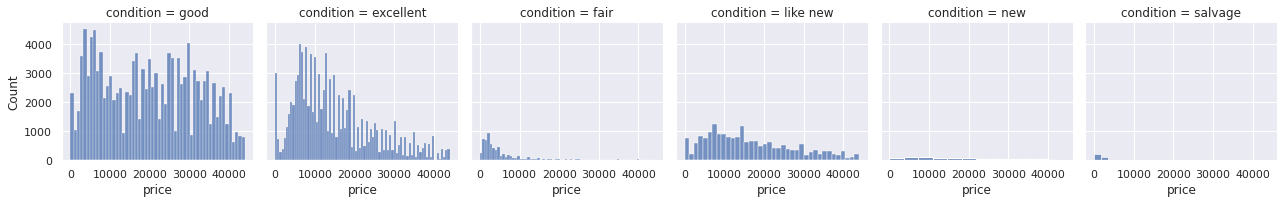

In [244]:
g = sns.FacetGrid(df, col="condition")
g.map(sns.histplot, "price")

---

#### --- Cylinders

> Mostrar valores únicos de cylinders.

In [245]:
df["cylinders"].unique()

array(['8 cylinders', '6 cylinders', '4 cylinders', '12 cylinders',
       '5 cylinders', 'other', '10 cylinders', '3 cylinders'],
      dtype=object)

> Graficar cantidad de automóviles de acuerdo al cylinders.

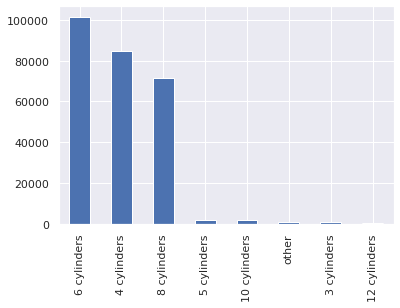

In [246]:
df['cylinders'].value_counts().plot.bar()

> Visualizar e identificar los outlier de Price & Cylinders después del primer análisis. 

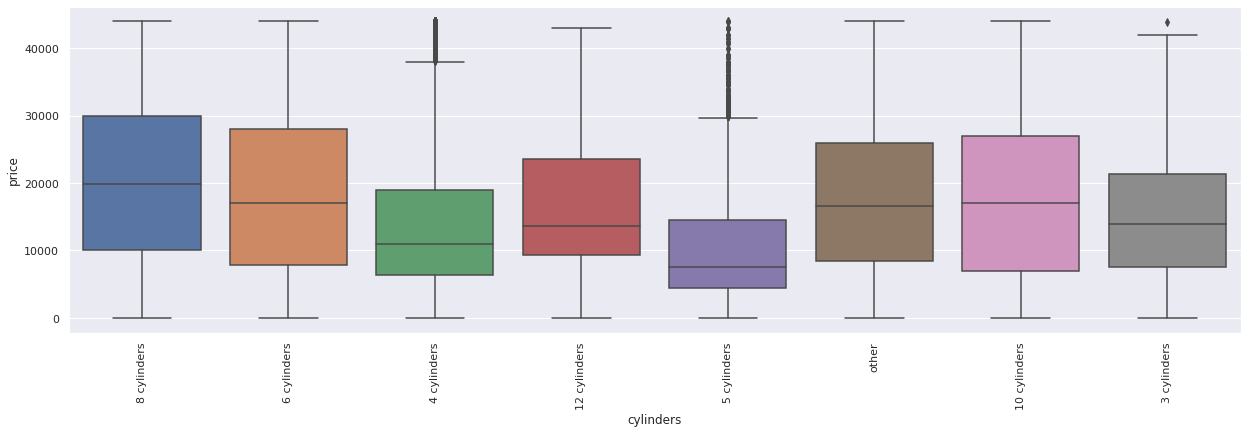

In [247]:
fig = plt.figure(figsize = (21,6))
sns.boxplot(data=df, x='cylinders', y='price')
plt.xticks(rotation=90)
plt.show()

> Análisis de Price & Cylinders

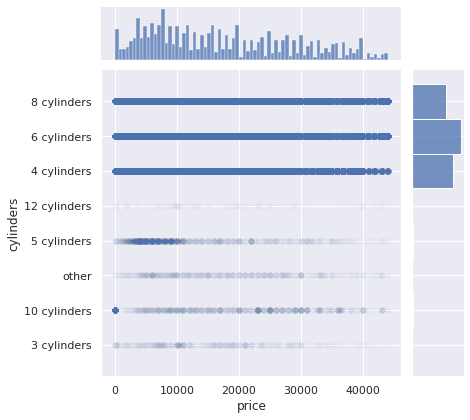

In [248]:
sns.jointplot(data=df, x='price', y='cylinders', alpha=0.01, dropna=True)

> Análisis de Price & Cylinders & Year.

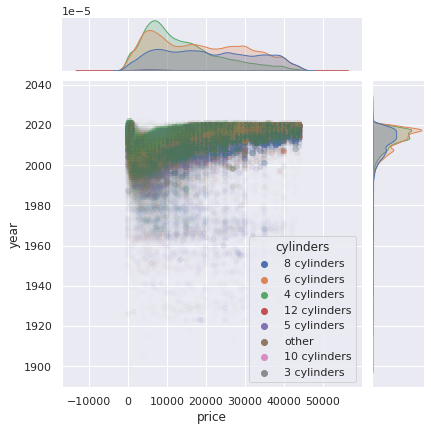

In [249]:
sns.jointplot(data=df, x='price', y='year', alpha=0.01, hue="cylinders")

**Conclusión**: Los 8 cilindros de un automóvil se encuentra presente en todo el rango de precios.

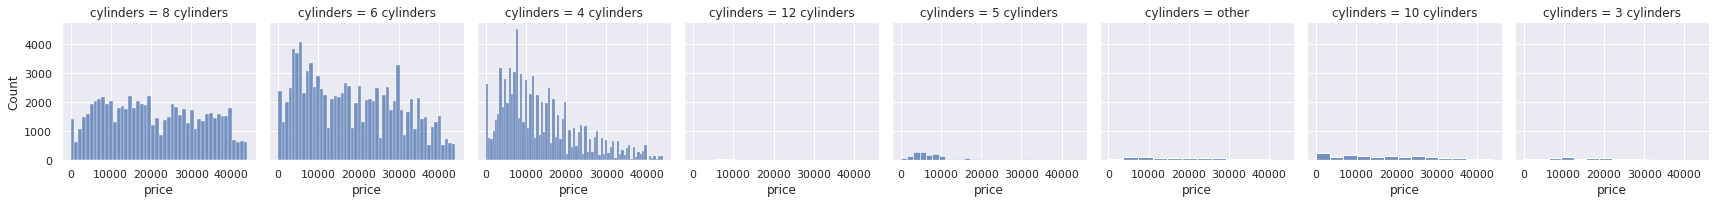

In [250]:
g = sns.FacetGrid(df, col="cylinders")
g.map(sns.histplot, "price")

---

#### --- Fuel

> Mostrar valores únicos de fuel.

In [251]:
df["fuel"].unique()

array(['gas', 'other', 'diesel', 'hybrid', 'electric'], dtype=object)

> Graficar cantidad de automóviles de acuerdo al fuel.

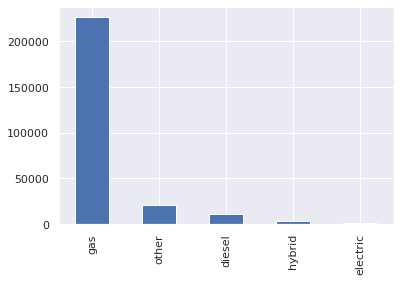

In [252]:
df['fuel'].value_counts().plot.bar()

> Visualizar e identificar los outlier de Price & Fuel después del primer análisis.

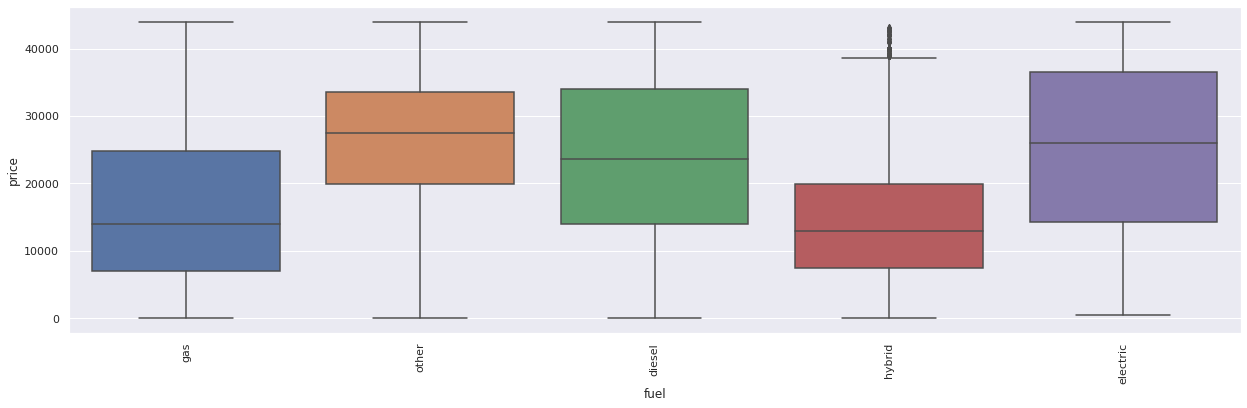

In [253]:
fig = plt.figure(figsize=(21,6))
sns.boxplot(data=df, x='fuel', y='price')
plt.xticks(rotation=90)
plt.show()

> Análisis de Price & Fuel

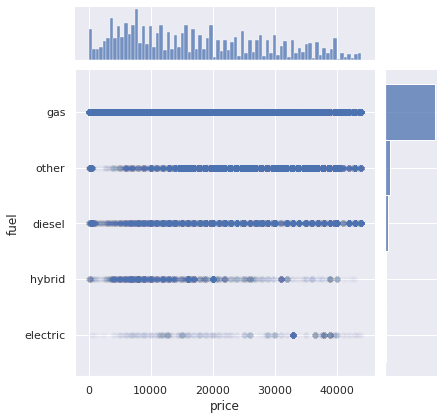

In [254]:
sns.jointplot(data=df, x='price', y='fuel', alpha=0.01, dropna=True)

> Análisis de Price & Condition & Year.

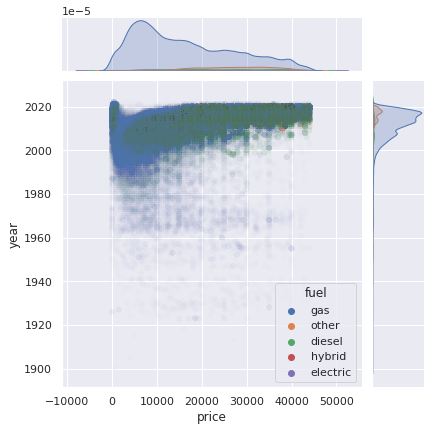

In [255]:
sns.jointplot(data=df, x='price', y='year', alpha=0.01, hue="fuel")

**Conclusión**: El tipo Gas de un automóvil se encuentra presente en todo el rango de precios.

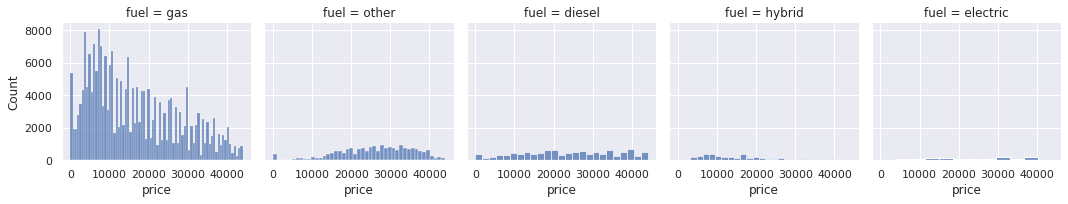

In [256]:
g = sns.FacetGrid(df, col="fuel")
g.map(sns.histplot, "price")

---

#### --- Title Status

> Mostrar valores únicos de title status.

In [257]:
df["title_status"].unique()

array(['clean', 'rebuilt', 'lien', 'salvage', 'missing', 'parts only'],
      dtype=object)

> Visualizar e identificar los outlier de Price & Title Status después del primer análisis. 

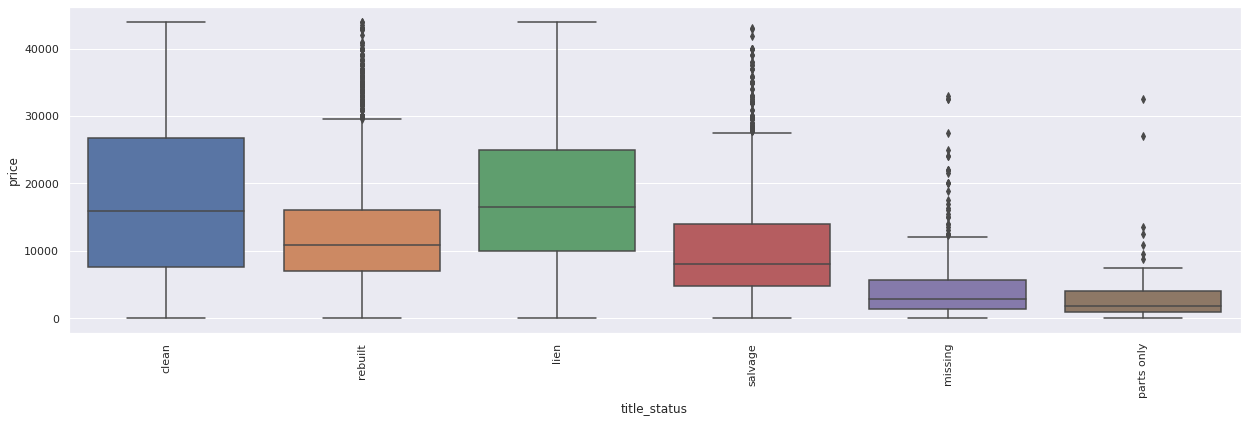

In [258]:
fig = plt.figure(figsize=(21,6))
sns.boxplot(data=df, x='title_status', y='price')
plt.xticks(rotation=90)
plt.show()

> Análisis de Price & Title Status.

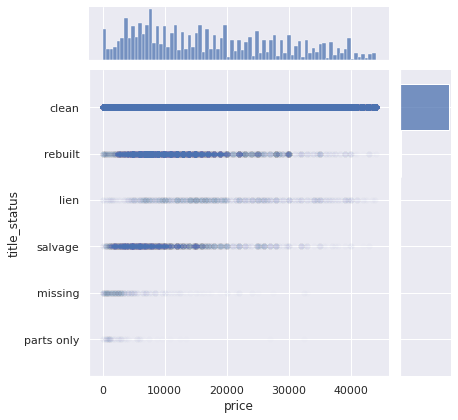

In [259]:
sns.jointplot(data=df, x='price', y='title_status', alpha=0.01, dropna=True)

> Análisis de Price & Title status &Year.

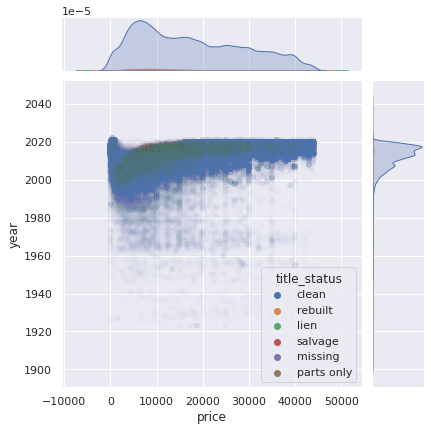

In [260]:
sns.jointplot(data=df, x='price', y='year', alpha=0.01, hue="title_status")

**Conclusión**: El status 'clean' de un automóvil se encuentra presente en todo el rango de precios

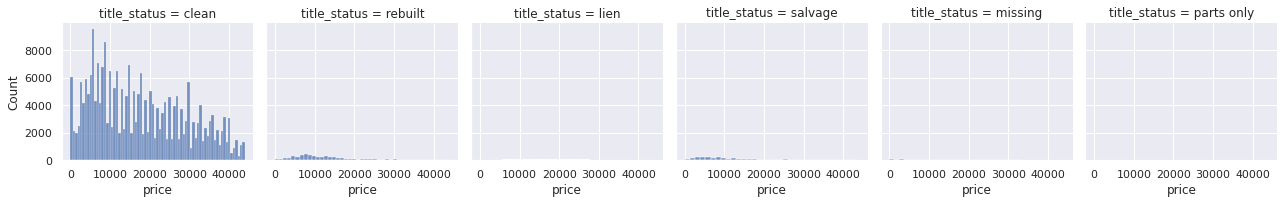

In [261]:
g = sns.FacetGrid(df, col="title_status")
g.map(sns.histplot, "price")

---

#### --- Transmission

> Mostrar valores únicos de transmission.

In [262]:
df["transmission"].unique()

array(['other', 'automatic', 'manual'], dtype=object)

> Visualizar e identificar los outlier de Price & Transmission después del primer análisis.

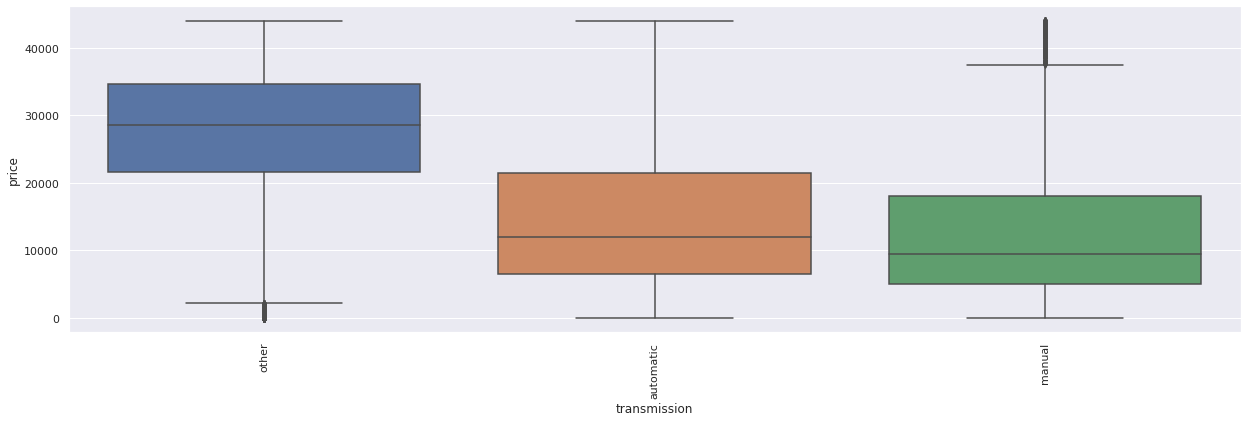

In [263]:
fig = plt.figure(figsize=(21,6))
sns.boxplot(data=df, x='transmission', y='price')
plt.xticks(rotation=90)
plt.show()

> Análisis de Price & Transmission.

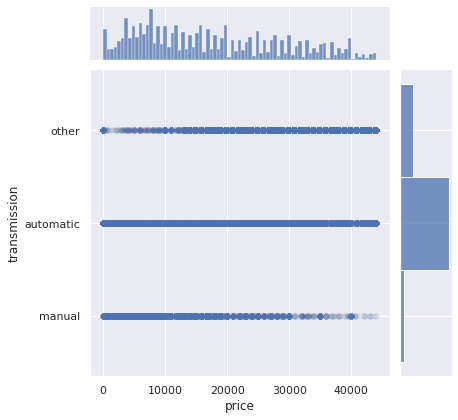

In [264]:
sns.jointplot(data=df, x='price', y='transmission', alpha=0.01, dropna=True)

> Análisis de Price & Transmission & Year.

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


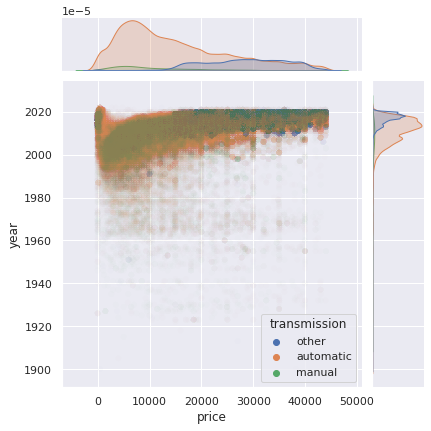

In [265]:
sns.jointplot(data=df, x='price', y='year', alpha=0.01, hue="transmission")

**Conclusión**: La transmisión automartica de un automóvil se encuentra presente en todo el rango de precios.

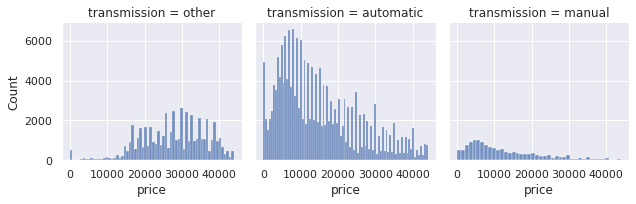

In [266]:
g = sns.FacetGrid(df, col="transmission")
g.map(sns.histplot, "price")


---

#### --- Drive

> Mostrar valores únicos de drive.

In [267]:
df["drive"].unique()

array(['4wd', 'fwd', 'rwd'], dtype=object)

> Graficar cantidad de automóviles de acuerdo al drive.

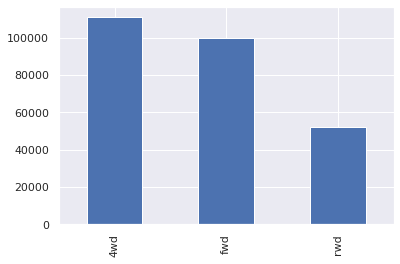

In [268]:
df['drive'].value_counts().plot.bar()

> Visualizar e identificar los outlier de Price & Drive después del primer análisis.

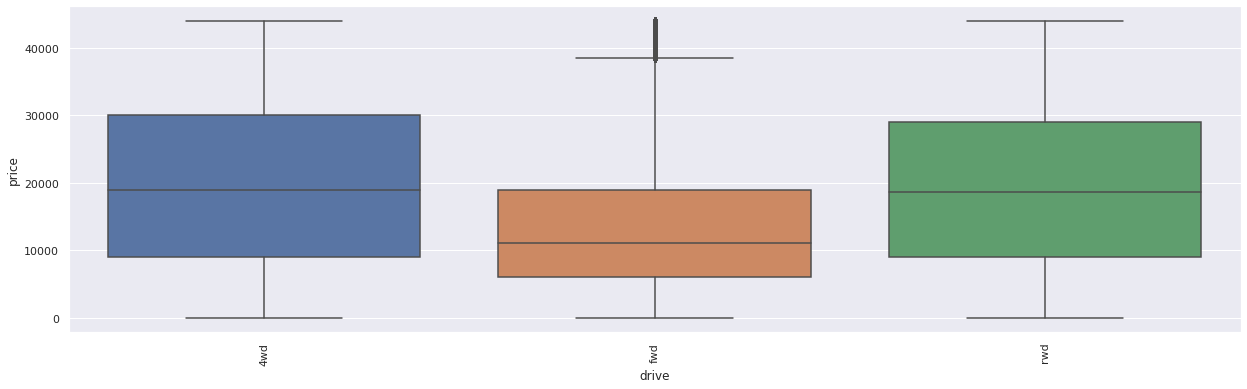

In [269]:
fig = plt.figure(figsize=(21,6))
sns.boxplot(data=df, x='drive', y='price')
plt.xticks(rotation=90)
plt.show()

> Análisis de Price & Drive.

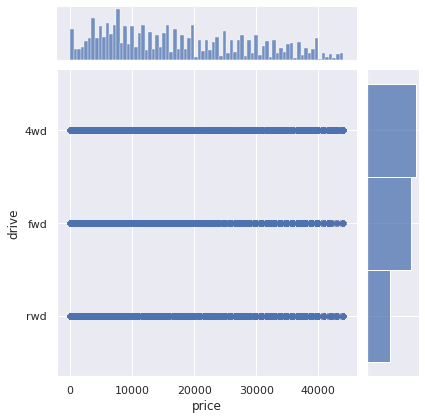

In [270]:
sns.jointplot(data=df, x='price', y='drive', alpha=0.01, dropna=True)

> Análisis de Price & Drive & Year.

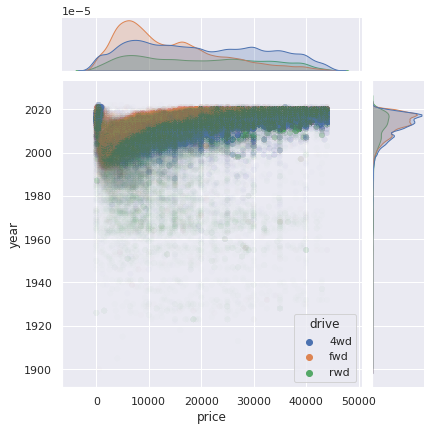

In [271]:
sns.jointplot(data=df, x='price', y='year', alpha=0.01, hue="drive")

**Conclusión**: El tipo de manejo 4WD de un automóvil se encuentra presente en todo el rango de precios.

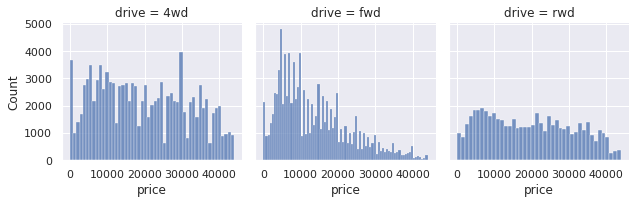

In [272]:
g = sns.FacetGrid(df, col="drive")
g.map(sns.histplot, "price")


---

#### --- Type

> Mostrar valores únicos de type.

In [273]:
df["type"].unique()

array(['pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'convertible', 'wagon', 'van',
       'bus'], dtype=object)

> Graficar cantidad de automóviles de acuerdo al type.

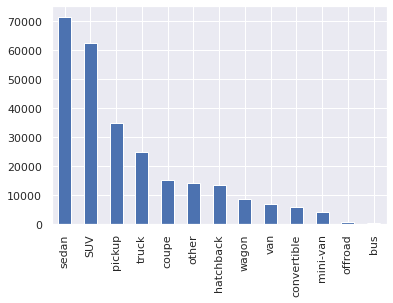

In [274]:
df['type'].value_counts().plot.bar()

> Visualizar e identificar los outlier de Price & Type después del primer análisis. 

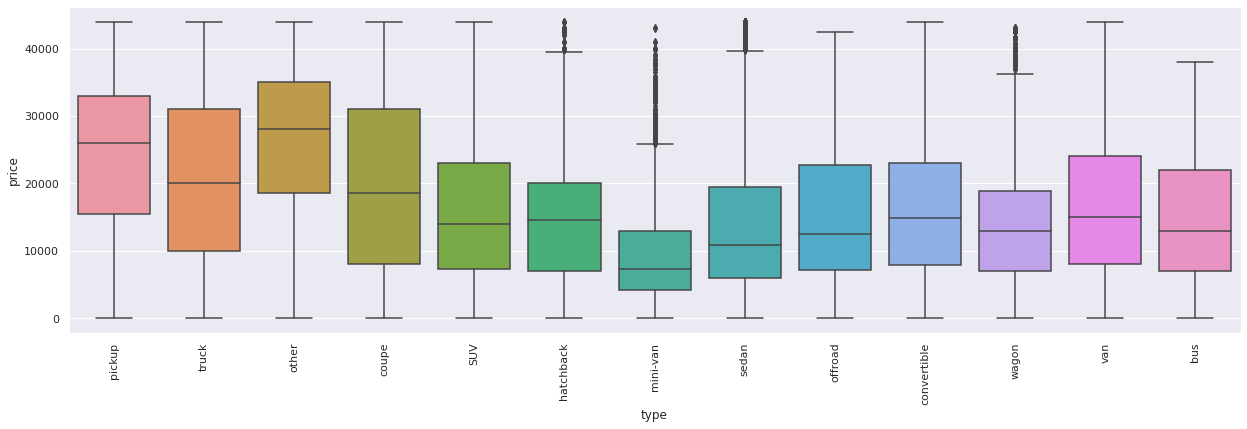

In [275]:
fig = plt.figure(figsize=(21,6))
sns.boxplot(data=df, x='type', y='price')
plt.xticks(rotation=90)
plt.show()

> Análisis de Price & Type

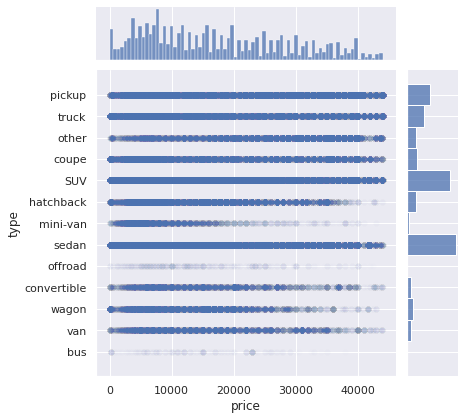

In [276]:
sns.jointplot(data=df, x='price', y='type', alpha=0.01, dropna=True)

> Análisis de Price & Type & Year.

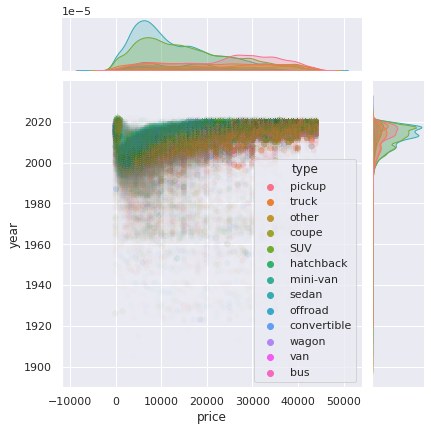

In [277]:
sns.jointplot(data=df, x='price', y='year', alpha=0.01, hue="type")

**Conclusión**: El tipo SUV y Sedan de un automóvil se encuentra presente en todo el rango de precios.

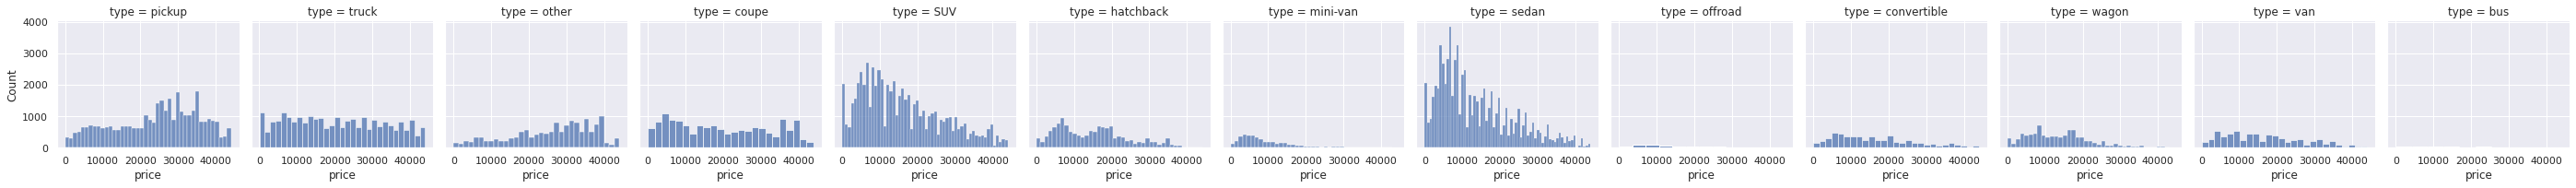

In [278]:
g = sns.FacetGrid(df, col="type")
g.map(sns.histplot, "price")

---

#### --- Paint color

> Mostrar valores únicos de paint color

In [279]:
df["paint_color"].unique()

array(['white', 'blue', 'red', 'black', 'silver', 'grey', 'brown',
       'green', 'yellow', 'orange', 'custom', 'purple'], dtype=object)

> Graficar cantidad de automóviles de acuerdo al paint_color

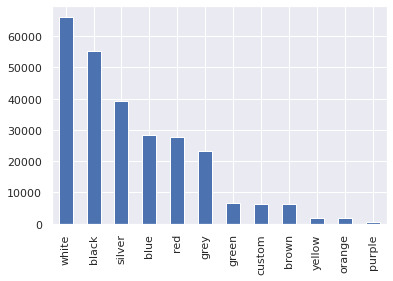

In [280]:
df['paint_color'].value_counts().plot.bar()

> Visualizar e identificar los outlier de Price & Paint color después del primer análisis.

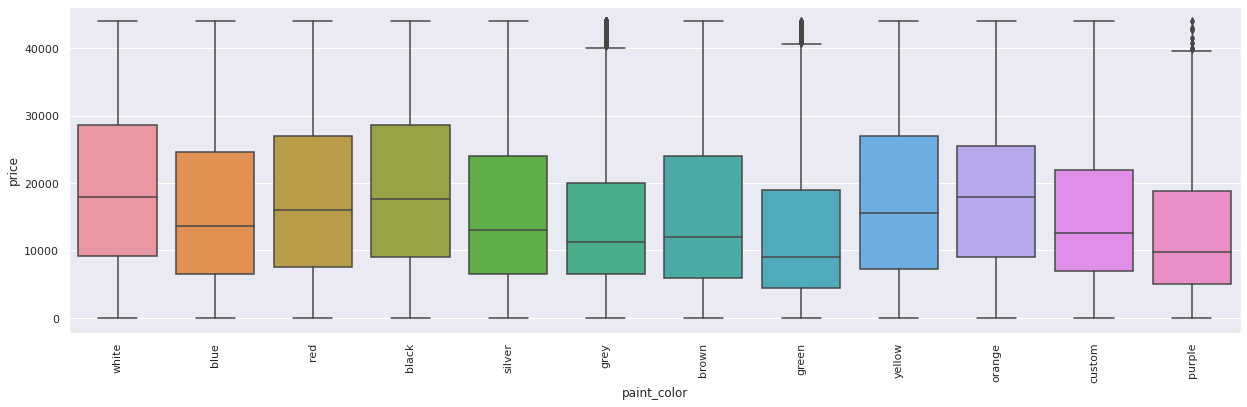

In [281]:
fig = plt.figure(figsize=(21,6))
sns.boxplot(data=df, x='paint_color', y='price')
plt.xticks(rotation=90)
plt.show()

> Análisis de Price & Paint color.

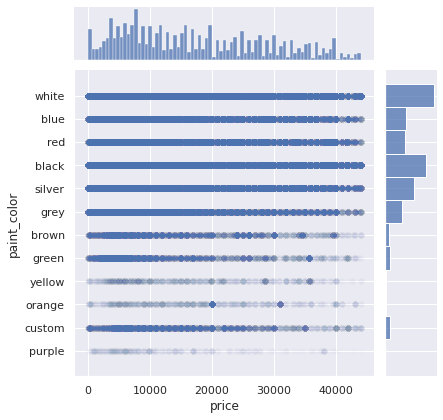

In [282]:
sns.jointplot(data=df, x='price', y='paint_color', alpha=0.01, dropna=True)

> Análisis de Price & Paint color & Year.

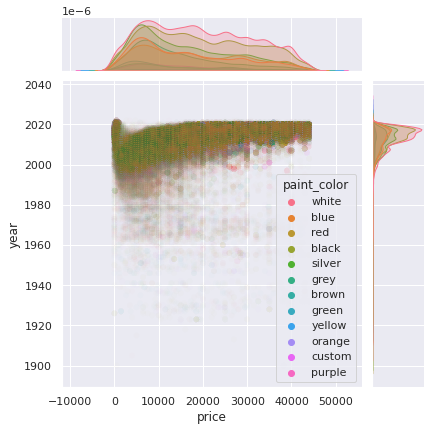

In [283]:
sns.jointplot(data=df, x='price', y='year', alpha=0.01, hue="paint_color")

**Conclusión**: Todo tipo de colores de un automóvil se encuentra presente en todo el rango de precios.

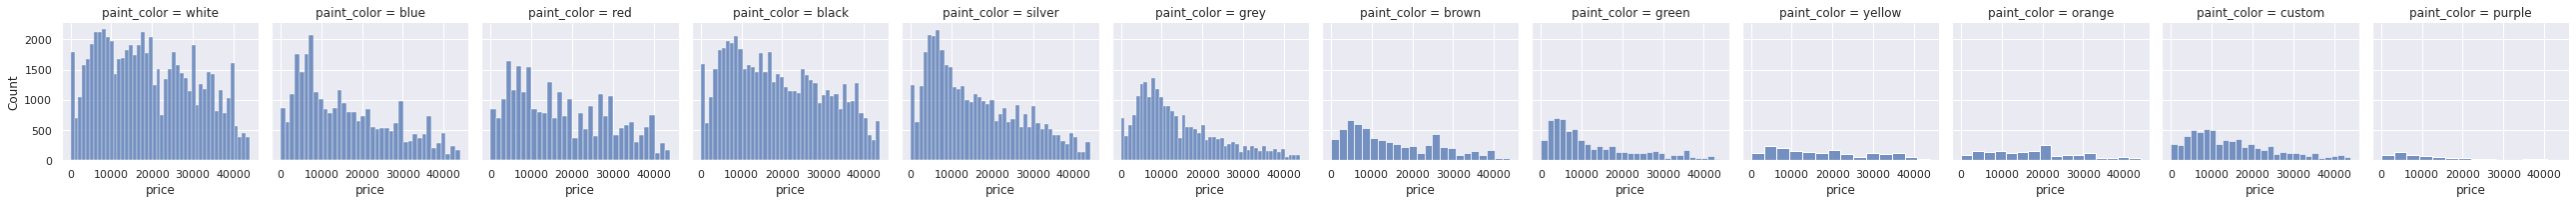

In [284]:
g = sns.FacetGrid(df, col="paint_color")
g.map(sns.histplot, "price")



---

#### --- Manufacturer

> Mostrar valores únicos de manufacturer.

In [285]:
df["manufacturer"].unique()

array(['gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'infiniti', 'lincoln', 'subaru', 'acura',
       'audi', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'alfa-romeo', 'volkswagen', 'porsche', 'kia', 'pontiac', 'fiat',
       'rover', 'mini', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'datsun', 'aston-martin', 'land rover', 'ferrari'], dtype=object)

> Graficar cantidad de automóviles de acuerdo al manufacturer.

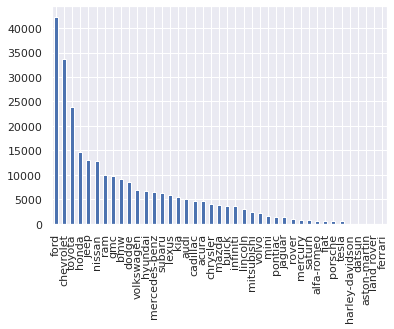

In [286]:
df['manufacturer'].value_counts().plot.bar()

> Visualizar e identificar los outlier de Price & Manufacturer después del primer análisis.

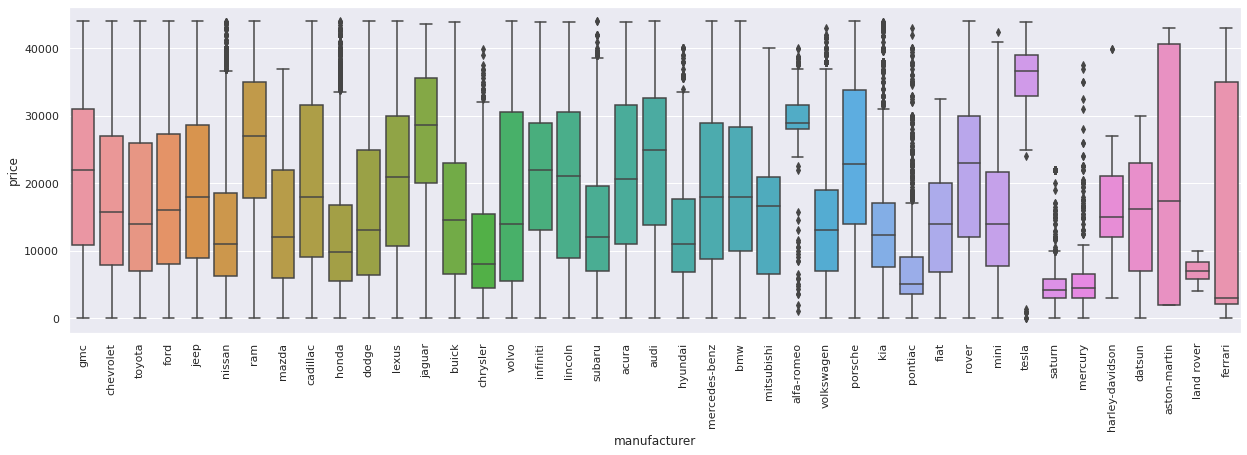

In [287]:
fig = plt.figure(figsize=(21,6))
sns.boxplot(data=df, x='manufacturer', y='price')
plt.xticks(rotation=90)
plt.show()

> Análisis de Price & Manufacturer.

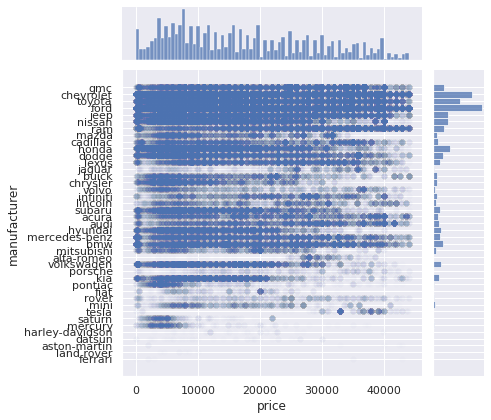

In [288]:
sns.jointplot(data=df, x='price', y='manufacturer', alpha=0.01, dropna=True)

**Conclusión**: claramente se observa que se redujeron los outlayers consideradamente después del primer análisis.

---

#### --- Model

> Mostrar valores únicos de model.

In [289]:
df["model"].unique()

array(['sierra 1500 crew cab slt', 'silverado 1500',
       'silverado 1500 crew', ..., 'cj 3a willys', 'rx& gls sport',
       'gand wagoneer'], dtype=object)



---

#### --- State

> Mostrar valores únicos de state

In [290]:
df["state"].unique()

array(['al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga',
       'hi', 'id', 'il', 'in', 'ia', 'ks', 'ky', 'la', 'me', 'md', 'ma',
       'mi', 'mn', 'ms', 'mo', 'mt', 'nc', 'ne', 'nv', 'nj', 'nm', 'ny',
       'nh', 'nd', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx',
       'ut', 'vt', 'va', 'wa', 'wv', 'wi', 'wy'], dtype=object)

> Graficar cantidad de automóviles de acuerdo al state

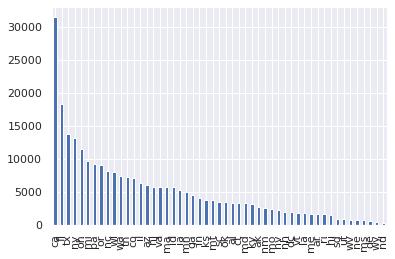

In [291]:
df['state'].value_counts().plot.bar()

### 6.2 Estadistica Descriptiva

> Incluyen el resumen de la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos, excluyendo los valores NaN. A continuación, se mostrará el análisis.

In [292]:
# Referencia: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
df_clean.describe(include=["object"]).T

count unique          top    freq
manufacturer  276852     41         ford   46041
model         276852  18350        f-150    5080
condition     276852      6         good  139821
cylinders     276852      8  6 cylinders  105970
fuel          276852      5          gas  234116
title_status  276852      6        clean  267239
transmission  276852      3    automatic  206934
drive         276852      3          4wd  122066
type          276852     13        sedan   72465
paint_color   276852     12        white   71027
state         276852     51           ca   32968

**Conclusión**: Podemos observar que los datos únicos son congruentes a la información que se espera.

#### Medidas de tendencia central
* **media** aritmética se define como la suma de N elementos dividida entre N. 
* **mediana** es el valor que dentro del conjunto de datos es menor que el 50% de los datos y mayor que el 50% restante.
* **moda** es el valor más repetido (solo aplicable a variables discretas).

> Obtener la media, mediana y moda del dataframe.

In [293]:
media = df["price"].mean()
mediana = df["price"].median()
moda = df["price"].mode().values[0]

print("Media: ", media)
print("Mediana: ", mediana)
print("Moda: ", moda)

Media:  17389.720908745247
Mediana:  15499.0
Moda:  29990


In [294]:
df.describe()
# referencia: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

price           year      odometer
count  263000.000000  263000.000000  2.630000e+05
mean    17389.720909    2011.424426  9.583785e+04
std     11480.985859       8.433317  1.644002e+05
min         1.000000    1900.000000  0.000000e+00
25%      7500.000000    2008.000000  3.804950e+04
50%     15499.000000    2013.000000  8.666950e+04
75%     25999.000000    2017.000000  1.350000e+05
max     43999.000000    2022.000000  1.000000e+07

### 6.3 Medidas de asimetría

Para valores cercanos a 0, la variable es simétrica. Si es positiva tiene cola a la derecha y si es negativa tiene cola a la izquierda.

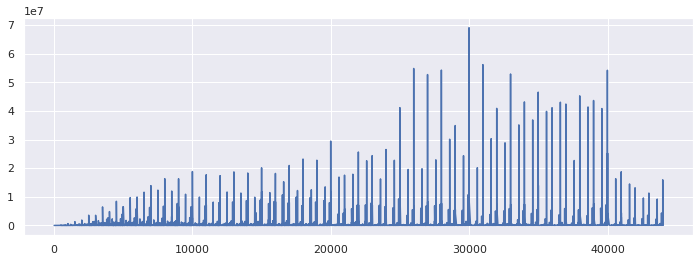

In [295]:
y = df[df["price"] > 0].groupby("price").price.sum()
x = y.index
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x, y)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


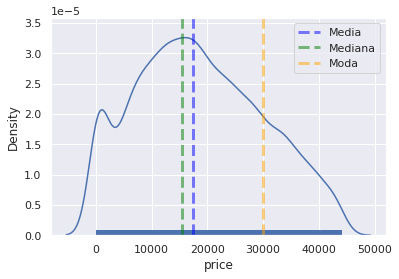

In [296]:
ax = sns.distplot(x, rug=True, hist=False)
ax.axvline(media, color='blue', linestyle='--', alpha=0.5,    linewidth=3, label='Media')
ax.axvline(mediana, color='green', linestyle='--', alpha=0.5,    linewidth=3, label='Mediana')
ax.axvline(moda, color='orange', linestyle='--', alpha=0.5,    linewidth=3, label='Moda')
ax.legend() 

**Conclusión**: Obtenemos una curva de asimetría positiva.

#### 6.3.1 Medidas de dispersión

* **varianza** es una de estas medidas de dispersión que se define como la media de las diferencias al cuadrado de los valores con respecto a la media
* **desviación estándar** es la raíz cuadrada de la varianza

In [297]:
varianza = df["price"].var() 
desviacion = df["price"].std()  

print("Varianza: ", varianza)
print("Desviación estándar: ", desviacion)

Varianza:  131813036.2853221
Desviación estándar:  11480.985858597776


* **rango** es la diferencia entre el máximo y el mínimo y el rango intercuartílico
* **IQR** es la diferencia entre el tercer y el primer cuartil.

In [298]:
rango = df["price"].max() - df["price"].min()
iqr = df["price"].quantile(0.75) - df["price"].quantile(0.25)

print("Rango: ", rango)
print("IQR: ", iqr)


Rango:  43998
IQR:  18499.0


> Realizar un ejemplo de una medida de dispersión

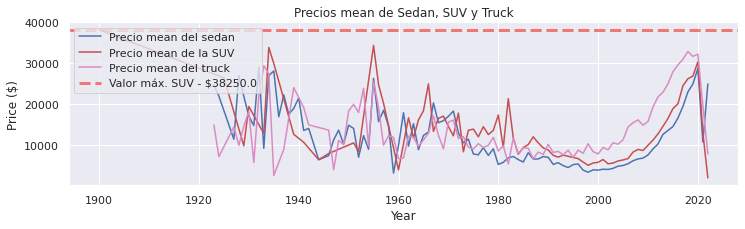

In [299]:
import operator

y_sedan = df[df["type"] == "sedan"].groupby("year").price.mean()
y_suv = df[(df["type"] == "SUV")].groupby("year").price.mean()
y_truck = df[(df["type"] == "truck")].groupby("year").price.mean()

fig, ax = plt.subplots(figsize=(12, 3))  
ax.plot(y_sedan.index, y_sedan, label='Precio mean del sedan')
ax.plot(y_suv.index, y_suv, label='Precio mean de la SUV', color='C3')
ax.plot(y_truck.index, y_truck, label='Precio mean del truck', color='C6')


stats = {'Sedan':y_sedan.max(), 'SUV':y_suv.max(), 'Truck': y_truck.max()}
max_key = max(stats.items(), key=operator.itemgetter(1))[0]
ax.axhline(stats[max_key], color='red', linestyle='--', alpha=0.5,    linewidth=3, label='Valor máx. {} - ${}'.format(max_key,stats[max_key]))

ax.set_xlabel('Year')  
ax.set_ylabel('Price ($)') 
ax.set_title('Precios mean de Sedan, SUV y Truck') 	
ax.legend() 


#### 6.4 Comportamiento de los datos

> Comportamiento del número de autos vendidos por año con respecto al combustible.

[Text(0, 0.5, 'Count vechicles'),
 Text(0.5, 0, 'years'),
 Text(0.5, 1.0, 'Fuel by year')]

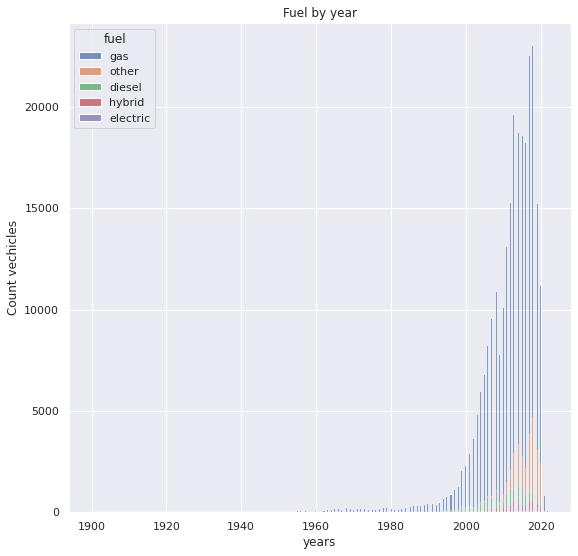

In [300]:
fig, ax = plt.subplots(figsize = (9, 9))
ax = sns.histplot(data=df, x="year", hue="fuel", multiple="stack")
ax.set(xlabel='years', ylabel='Count vechicles', title='Fuel by year')

> Observar los costos más altos o bajos de acuerdo a la condición. 

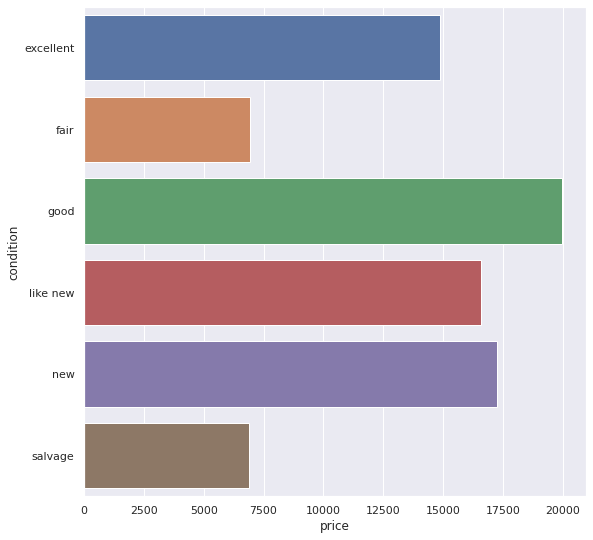

In [301]:
condition_price = df.groupby('condition', as_index=False)['price'].mean().round()
fig, ax = plt.subplots(figsize = (9, 9))
sns.barplot(x='price', y='condition',data=condition_price, orient='h', ax=ax)

> Comportamiento del precio con respecto al odometer.

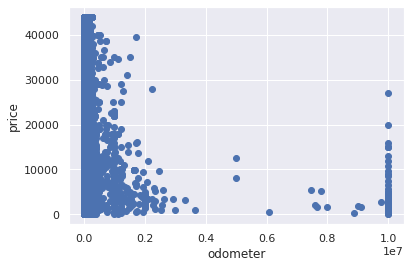

In [302]:
y = df['price']
x = df['odometer']
plt.scatter(x, y)
plt.xlabel('odometer')
plt.ylabel('price')
plt.show()

> Comportamiento de Drive con el Price.

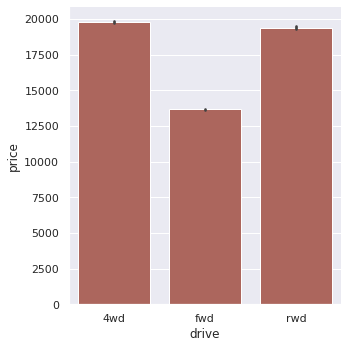

In [303]:
sns.catplot(x="drive", y="price",kind="bar",color="#B95C50", data=df)

> Distribución del precio a lo largo de los años.

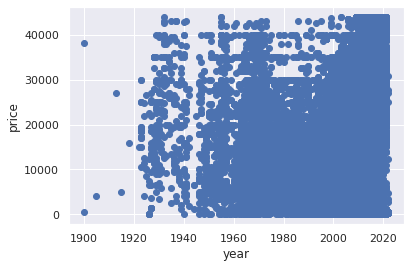

In [304]:
y = df['price']
x = df['year']
plt.scatter(x, y)
plt.xlabel('year')
plt.ylabel('price')
plt.show()

> Obtener el precio máximo del promedio de 3 modelos (sedan, suv y truck)

In [305]:
df_clean = df.dropna().copy()
df_clean.head()

price    year manufacturer                     model  condition  \
27  33590  2014.0          gmc  sierra 1500 crew cab slt       good   
28  22590  2010.0    chevrolet            silverado 1500       good   
29  39590  2020.0    chevrolet       silverado 1500 crew       good   
30  30990  2017.0       toyota      tundra double cab sr       good   
31  15000  2013.0         ford                 f-150 xlt  excellent   

      cylinders fuel  odometer title_status transmission drive    type  \
27  8 cylinders  gas   57923.0        clean        other   4wd  pickup   
28  8 cylinders  gas   71229.0        clean        other   fwd  pickup   
29  8 cylinders  gas   19160.0        clean        other   fwd  pickup   
30  8 cylinders  gas   41124.0        clean        other   fwd  pickup   
31  6 cylinders  gas  128000.0        clean    automatic   rwd   truck   

   paint_color state  
27       white    al  
28        blue    al  
29         red    al  
30         red    al  
31       black    al

>Los datos estan repartidos de forma simétrica existen varios coeficientes: Pearson, Fisher, Bowley-Yule, etc

#### 6.5 Correlación de los datos

In [306]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

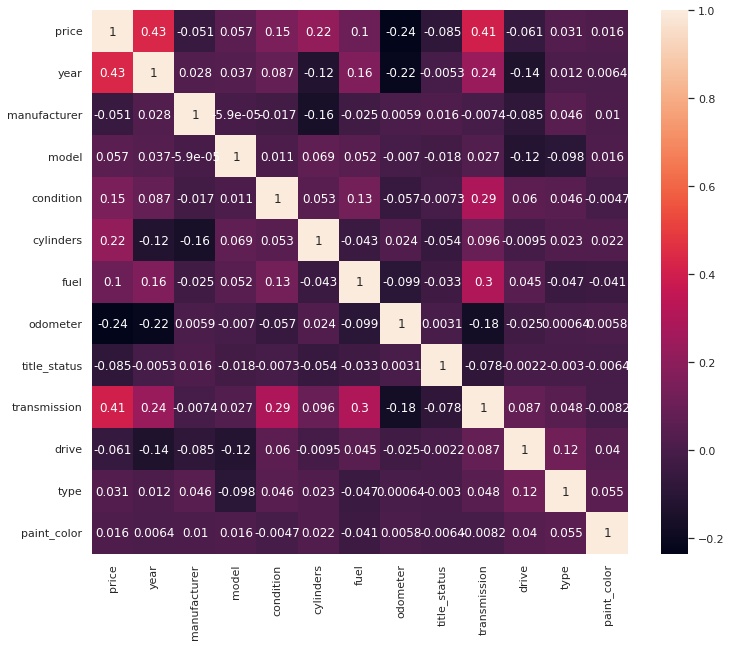

In [307]:
# Correlacion Pearson
le = preprocessing.LabelEncoder()
df_clean[['condition','manufacturer','model','cylinders','fuel','title_status','transmission','drive','type','paint_color']] = df_clean[['condition','manufacturer','model','cylinders','fuel','title_status','transmission','drive','type','paint_color']].apply(le.fit_transform)

from sklearn.preprocessing import MinMaxScaler

df_clean["price"] = np.sqrt(preprocessing.minmax_scale(df_clean["price"]))
plt.figure(figsize=(12,10))
cor = df_clean.corr()
sns.heatmap(cor, annot=True)
plt.show()

g = sns.pairplot(df, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

De acuerdo con el análisis anterior de determina las variables independientes y la variable dependiente.

### **Dependiente**
* price: Cuantitativa continua

### **Independiente**
* year: Cuantitativa discreta	
* manufacturer: Cualitativa nominal	
* model: Cualitativa nominal
* condition: Cualitativa ordinal	
* cylinders: Cualitativa nominal
* fuel: Cualitativa	nominal
* odometer: Cuantitativa continua	
* title_status: Cualitativa nominal	
* transmission: Cualitativa nominal	
* drive: Cualitativa nominal	
* size: Cualitativa nominal	
* type: Cualitativa nominal	
* paint_color: Cualitativa nominal	
* county: Cualitativa nominal	

### **Columnas Eliminadas**
* id	
* url	
* region	
* region_url	
* VIN	
* image_url	
* description	
* lat
* long	
* posting_date
* state

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263000 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         263000 non-null  int64  
 1   year          263000 non-null  float64
 2   manufacturer  263000 non-null  object 
 3   model         263000 non-null  object 
 4   condition     263000 non-null  object 
 5   cylinders     263000 non-null  object 
 6   fuel          263000 non-null  object 
 7   odometer      263000 non-null  float64
 8   title_status  263000 non-null  object 
 9   transmission  263000 non-null  object 
 10  drive         263000 non-null  object 
 11  type          263000 non-null  object 
 12  paint_color   263000 non-null  object 
 13  state         263000 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 38.2+ MB


In [309]:
df.describe()

price           year      odometer
count  263000.000000  263000.000000  2.630000e+05
mean    17389.720909    2011.424426  9.583785e+04
std     11480.985859       8.433317  1.644002e+05
min         1.000000    1900.000000  0.000000e+00
25%      7500.000000    2008.000000  3.804950e+04
50%     15499.000000    2013.000000  8.666950e+04
75%     25999.000000    2017.000000  1.350000e+05
max     43999.000000    2022.000000  1.000000e+07

In [310]:
df.head()

price    year manufacturer                     model  condition  \
27  33590  2014.0          gmc  sierra 1500 crew cab slt       good   
28  22590  2010.0    chevrolet            silverado 1500       good   
29  39590  2020.0    chevrolet       silverado 1500 crew       good   
30  30990  2017.0       toyota      tundra double cab sr       good   
31  15000  2013.0         ford                 f-150 xlt  excellent   

      cylinders fuel  odometer title_status transmission drive    type  \
27  8 cylinders  gas   57923.0        clean        other   4wd  pickup   
28  8 cylinders  gas   71229.0        clean        other   fwd  pickup   
29  8 cylinders  gas   19160.0        clean        other   fwd  pickup   
30  8 cylinders  gas   41124.0        clean        other   fwd  pickup   
31  6 cylinders  gas  128000.0        clean    automatic   rwd   truck   

   paint_color state  
27       white    al  
28        blue    al  
29         red    al  
30         red    al  
31       black    al

> Devuelve un DataFrame con los coeficientes de correlación de Pearson de los datos de las columnas numéricas del DataFrame df

In [311]:
df.corr()

price      year  odometer
price     1.000000  0.434874 -0.238010
year      0.434874  1.000000 -0.216183
odometer -0.238010 -0.216183  1.000000

In [312]:
df.isna().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

## **7.- Introducción a Machine Learning**


---



#### **Marco CRISP-DM**

**CRISP-DM**, que son las siglas de Cross-Industry Standard Process for Data Mining, es un método probado para orientar sus trabajos de minería de datos.
Como metodología, incluye descripciones de las fases normales de un proyecto, las tareas necesarias en cada fase y una explicación de las relaciones entre las tareas.
Como modelo de proceso, CRISP-DM ofrece un resumen del ciclo vital de minería de datos.
Contiene 6 fases importantes que se encuentran relacionadas.
* Comprensión 
del negocio
* Comprensión
de datos
* Preparación
de datos
* Modelado
* Evaluación
* Despliegue

#### **Feature Engineering**
Proceso previo a la creación del modelo en el que se hace análisis, limpieza y estructuración de los datos. 

El objetivo es eliminar los campos que no sirven para hacer la predicción y organizarlos adecuadamente para que el modelo no reciba información que no le es útil y que podría provocar predicciones de poca calidad o confianza. 

Consiste en diferentes procesos:
* Feature Creation: Es el proceso de crear nuevas variables con el fin de desarrollar modelos más eficientes. 
* Transformaciones: Es el proceso de convertir variables por medio de algún proceso de escalamiento o encoding
* Feature Extraction: Es el proceso de extraer variables o features de los datasets con el fin de identificar qué información es útil.
* Exploratory Data Analysis: Es el proceso de obtener gráficos y resúmenes descriptivos de los datos con el fin de mejorar el entendimiento de la data explorando sus propiedades
* Benchmark: Es el proceso de crear un modelo de aprendizaje automático fácil de utilizar, confiable, transparente e interpretable. 

#### **One Hot Encoding**
Toman variables numéricas para medir la distancia. Sin embargo, existe la manera de trabajar con variables categóricas haciéndolas variables dummy, a través del uso de la técnica de transformación de datos One Hot Encoding (OHE). No permite convertir strings directamente.

#### **Label Encoder**
One Hot Encoding no es la única técnica para transformar variables categóricas, existe una alternativa para reducir el problema de multidimensionalidad cuando tenemos muchas categorías en una variable a través del uso de la técnica de transformación de datos Label Encoder (LE).

#### **Getdummies()**
Es un método similar a One Hot Encoding el cual transforma variables categórica en dummies. La diferencia es que One Hot Encoding almacena la transformación en un objeto. Una vez que se tiene la instancia OneHotEncoder(), se puede guardar para ser usada más tarde en las siguientes fases de manipulación de datos


> Referencia class: 40



> Instalar liberías necesarias para el análisis.

In [313]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score

> Asignar el dataframe depurado a label_reg para ejecutar el análisis

In [314]:
label_reg = df.copy()

> Entrenar los modelos con la mayor cantidad de columnas, es necesario ocupar LabelEncoder(): codifica etiquetas de una característica categórica en valores numéricos entre 0 y el número de clases menos 1

In [315]:
le_manufacturer = LabelEncoder()
le_model = LabelEncoder()
le_fuel = LabelEncoder()
le_title_status = LabelEncoder()
le_transmission = LabelEncoder()
le_condition = LabelEncoder()
le_drive = LabelEncoder()
le_type = LabelEncoder()
le_color = LabelEncoder()
le_state = LabelEncoder()

> Ingresar de forma individual el LabelEncoder()

In [316]:
label_reg["type"] = le_type.fit_transform(label_reg['type'])
label_reg["manufacturer"] = le_manufacturer.fit_transform(label_reg['manufacturer'])
label_reg['paint_color'] = le_color.fit_transform(label_reg['paint_color'])
label_reg['drive'] = le_drive.fit_transform(label_reg['drive'])
label_reg["fuel"] = le_fuel.fit_transform(label_reg['fuel'])
label_reg["title_status"] = le_title_status.fit_transform(label_reg['title_status'])
label_reg['transmission'] = le_transmission.fit_transform(label_reg['transmission'])
label_reg['condition'] = le_condition.fit_transform(label_reg['condition'])
label_reg['state'] = le_state.fit_transform(label_reg['state'])
label_reg['model'] = le_model.fit_transform(label_reg['model'])

label_reg.head()

price    year  manufacturer  model  condition    cylinders  fuel  \
27  33590  2014.0            14  13675          2  8 cylinders     2   
28  22590  2010.0             7  13907          2  8 cylinders     2   
29  39590  2020.0             7  13923          2  8 cylinders     2   
30  30990  2017.0            38  15987          2  8 cylinders     2   
31  15000  2013.0            13   6989          0  6 cylinders     2   

    odometer  title_status  transmission  drive  type  paint_color  state  
27   57923.0             0             2      0     8           10      1  
28   71229.0             0             2      1     8            1      1  
29   19160.0             0             2      1     8            8      1  
30   41124.0             0             2      1     8            8      1  
31  128000.0             0             0      2    10            0      1

> Asignar manualmente LabelEncoder() a la columna cylinders, es un campo alfanúmerico

In [317]:
label_reg['cylinders'] = label_reg['cylinders'].str.replace(r'[^0-9]', '', regex=True)
label_reg['cylinders'] = label_reg['cylinders'].str.replace(r'^\s*$', '1', regex=True)
label_reg['cylinders'] = label_reg['cylinders'].astype(int)

## **8.- Algoritmo de ML**


---



![Scikit Learn](https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)

Scikit-learn es probablemente la librería más útil para Machine Learning en Python, es de código abierto y es reutilizable en varios contextos. Proporciona además una gama de algoritmos de aprendizaje supervisados y no supervisados en Python.

**Ventajas**

* Interfaz consistente
* Variedad de módulos y algoritmos
* Posibilidad de extraer datos de varios repositorios
* Parámetros de configuración
* Documentación
* Comunidad

**Referencia**: https://scikit-learn.org/stable/

#### Aprendizaje Supervisado

**Problemas de Clasificación:** Necesitan predecir la clase más probable de un elemento, en función de un conjunto de variables de entrada. La variable target es una variable de tipo categórica.


**Problemas de Regresión**: En vez de predecir categorías, **predicen valores numéricos**. La variable target en un problema de regresión es de tipo **cuantitativa**.


**Regresión lineal**: técnica estadística (*modelo estadístico*) que permite encontrar la asociación lineal entre una variable dependiente (Y) y una/varias variable(s) independiente(s) llamadas X’s, puede ser simple (1 variable independiente) o múltiple (más de 1 variable independiente).

y=𝞪+𝜷X +𝟄

𝞪= intercepto (valor que toma Y cuando X vale 0)
𝜷= es la pendiente (indica cómo cambia Y al incrementar X en una unidad)
𝟄= representa el error aleatorio con una distribución normal (0,𝞼)

**Parámetros**: son las variables que usan los modelos para ajustarse a los datos. Se definen como la estructura interna del modelos ya que son las características del mismo.

**Hiperparametros**: variables que rigen el proceso de entrenamiento, no están directamente relacionadas con los datos de entrenamiento sino que son de configuración y por ende son constantes durante cualquier entrenamiento.


> Referencia class: 41


### 8.1 Evaluando Modelos ML

> Dividir el dataset en train y test

In [318]:
X = label_reg.drop(['price'], axis=1)
y = label_reg['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=25)

> Crear una función para establecer los modelos de entrenamiento. 

> Referencia class: 42.

In [319]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

def train_ml_model(x, y, model_type):

    if model_type == 'lr':
        model = LinearRegression()

    elif model_type == 'dtr':
        model = DecisionTreeRegressor(max_depth=3, random_state=42)

    elif model_type == 'knr':
        model = KNeighborsRegressor(n_neighbors=5)

    elif model_type == 'rf':
        model = RandomForestRegressor()  

    elif model_type == 'svr':
        model = SVR(kernel='linear', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)

    elif model_type == 'xgb':
        model = XGBRegressor(random_state = 42, silent = True)

    elif model_type == 'r':
        model = Ridge()  

    elif model_type == 'l':
        model = Lasso()  

    elif model_type == 'byr':
        model = BayesianRidge()  

    elif model_type == 'knr':
        model = KNeighborsRegressor()  

    elif model_type == 'bgr':
        model = BaggingRegressor()  

    elif model_type == 'ar':
        model = AdaBoostRegressor()  

    elif model_type == 'gbr':
        model = GradientBoostingRegressor()  

    elif model_type == 'hbr':
        model = HistGradientBoostingRegressor()

    elif model_type == 'mlp':
        model = MLPRegressor() 

    elif model_type == 'gnb':
        model = GaussianNB() 

    elif model_type == 'etr':
        model = ExtraTreesRegressor(random_state=0, n_estimators = 250, max_features = None, min_samples_split = 6)

    elif model_type == 'cv_lr':
        # GridSearchCV para ajustar los hiperparámetros
        folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

        hyper_params = [{'n_features_to_select': list(range(1, len(x.columns) + 1))}]

        lm = LinearRegression()
        lm.fit(x, y)
        rfe = RFE(lm)             

        model_cv = GridSearchCV(estimator = rfe, 
                                param_grid = hyper_params, 
                                scoring= 'r2', 
                                cv = folds, 
                                verbose = 1,
                                return_train_score=True)      
        model =  model_cv        

    elif model_type == 'cv_rf':
        # GridSearchCV para ajustar los hiperparámetros
        model = RandomForestRegressor()
        model.fit(X_train, y_train)
        param_grid = [
            {'n_estimators': [10, 50, 100], 'max_features': ['sqrt', 'log2']},
            {'bootstrap': [False], 'n_estimators': [10, 100], 'max_features': [2, 3, 4]},
        ]
        model = GridSearchCV(model, param_grid, cv = 5, return_train_score = True)              

    return model.fit(x, y)

##### Flujo de trabajo


1.   Creación: Selección del modelo y parámetros. clf = sklearn.tree.DecisionTreeClassifier()
2.   Entrenamiento: Training data X e Y. clf = clf.fit(X,Y)
3.   Predicción: Entrada X. Y_pred = clf.predict(X)

> Referencia class: 41







In [320]:
import sklearn

In [321]:
# Se entrenará los modelos con el dataset.

# Regresión Lineal (LinearRegression)
model_lr = train_ml_model(X_train, y_train, 'lr')

# Arbol de Decisión para Regresión (DecisionTreeRegressor)
model_dtr = train_ml_model(X_train, y_train, 'dtr')

# Knn (KNeighborsRegressor)
model_knr = train_ml_model(X_train, y_train, 'knr')

# Random Forest RandomForestRegressor (RandomForestRegressor)
model_rf = train_ml_model(X_train, y_train, 'rf')

# SVM (SVR)
# model_svr = train_ml_model(X_train, y_train, 'svr')

# XGBoost
model_xgb = train_ml_model(X_train, y_train, 'xgb')

# Ridge
model_r = train_ml_model(X_train, y_train, 'r')

# Lasso
model_l = train_ml_model(X_train, y_train, 'l')

# BayesianRidge
model_byr = train_ml_model(X_train, y_train, 'byr')

# KNeighborsRegressor
model_knr = train_ml_model(X_train, y_train, 'knr')

# BaggingRegressor
model_bgr = train_ml_model(X_train, y_train, 'bgr')

# AdaBoostRegressor
model_ar = train_ml_model(X_train, y_train, 'ar')

# GradientBoostingRegressor
model_gbr = train_ml_model(X_train, y_train, 'gbr')

# HistGradientBoostingRegressor
model_hbr = train_ml_model(X_train, y_train, 'hbr')

# MLPRegressor
model_mlp = train_ml_model(X_train, y_train, 'mlp')

# GaussianNB
model_gnb = train_ml_model(X_train, y_train, 'gnb')

# ExtraTreesRegressor
model_etr = train_ml_model(X_train, y_train, 'etr')


In [322]:
# GridSearchCV para ajustar los hiperparámetros del modelo LinearRegression
model_cv_lr = train_ml_model(X_train, y_train, 'cv_lr')

# GridSearchCV para ajustar los hiperparámetros del modelo RandomForestRegressor()
model_cv_rf = train_ml_model(X_train, y_train, 'cv_rf')

Fitting 5 folds for each of 13 candidates, totalling 65 fits


> Referencia class: 42

### 8.2 Métricas para algoritmos

Clasificación
* Precision: True Positive / Actual Results
* Recall: True Positive /  Predicted Results
* Accuracy: (True Positive + True Negative) / Total
* Especificity True Negatives / (True Negatives + False Positives)

Regresión

* RMSE (*Root Mean Squared Error*)
* MAE (*Mean Absolute Error*)
* R2
* MAPE (*Mean Absolute Percentage Error*): mide el error en términos de porcentaje
* RAE (*Relative Absolute Error*)

> Referencia class: 45 & 46

**Conclusión**: Se ocuparán las métricas para regresión por el caso de uso de este proyecto

In [323]:
# Comparamos los modelos de regresión

def model_evaluate(models, X_test, y_test, X_train, y_train):

    MSE_test_result = []
    MSE_train_result = []   

    MAE_test_result = []
    MAE_train_result = []  

    MAPE_test_result = []
    MAPE_train_result = []  

    R2_test_result = []
    R2_train_result = []  

    str_models = []

    for name, model in models.items():
        # Model
        y_predictions_test = model.predict(X_test)
        y_predictions_train = model.predict(X_train)
        # predictions=np.exp(predictions)

        # mean_squared_error
        mse_test = mean_squared_error(y_test, y_predictions_test)
        mse_train = mean_squared_error(y_train, y_predictions_train)

        # mean_absolute_error
        mae_test = mean_absolute_error(y_test, y_predictions_test)
        mae_train = mean_absolute_error(y_train, y_predictions_train)

        # mean_absolute_percentage_error
        mape_test = mean_absolute_percentage_error(y_test, y_predictions_test)
        mape_train = mean_absolute_percentage_error(y_train, y_predictions_train)

        # r2_score
        r2_score_test = r2_score(y_test, y_predictions_test)
        r2_score_train = r2_score(y_train, y_predictions_train)

        # Guardar resultados
        MSE_test_result.append(mse_test)
        MSE_train_result.append(mse_train)

        MAE_test_result.append(mae_test)  
        MAE_train_result.append(mae_train)  

        MAPE_test_result.append(mape_test)
        MAPE_train_result.append(mape_train)

        R2_test_result.append(r2_score_test) 
        R2_train_result.append(r2_score_train) 

        str_models.append(str(name))

    return pd.DataFrame({'models':str_models, 'MSE-test':MSE_test_result, 'MSE-train':MSE_train_result, 'MAE-test':MAE_test_result, 'MAE-train':MAE_train_result, 'MAPE-test':MAPE_test_result, 'MAPE-train':MAPE_train_result, 'R2-test':R2_test_result, 'R2-train':R2_train_result}) 

In [324]:
models = {
    "LinearRegression": model_lr, 
    "DecisionTreeRegressor": model_dtr, 
    "KNeighborsRegressor": model_knr, 
    "RandomForestRegressor": model_rf, 
    "XGBoost": model_xgb, 
    "Ridge": model_r,
    "Lasso": model_l, 
    "BayesianRidge": model_byr,
    "KNeighborsRegressor": model_knr, 
    "BaggingRegressor": model_bgr, 
    "AdaBoostRegressor": model_ar, 
    "GradientBoostingRegressor": model_gbr, 
    "HistGradientBoostingRegressor": model_hbr, 
    "MLPRegressor": model_mlp
}

model_evaluate(models, X_test, y_test, X_train, y_train).sort_values(by=['R2-test'], ascending=False)

models      MSE-test     MSE-train     MAE-test  \
3           RandomForestRegressor  1.561569e+07  2.284752e+06  2070.953664   
8                BaggingRegressor  1.733819e+07  3.297504e+06  2215.802827   
11  HistGradientBoostingRegressor  2.792163e+07  2.733416e+07  3466.596810   
10      GradientBoostingRegressor  3.773564e+07  3.750435e+07  4219.852572   
4                         XGBoost  3.776829e+07  3.751762e+07  4223.087198   
2             KNeighborsRegressor  4.170302e+07  2.620211e+07  3924.933749   
9               AdaBoostRegressor  5.899451e+07  5.941448e+07  6105.023198   
1           DecisionTreeRegressor  6.649062e+07  6.616107e+07  6223.134205   
12                   MLPRegressor  7.531137e+07  7.613092e+07  6679.530409   
0                LinearRegression  8.051063e+07  8.098795e+07  6921.343891   
5                           Ridge  8.051063e+07  8.098795e+07  6921.345577   
6                           Lasso  8.051072e+07  8.098796e+07  6921.502170   
7                   BayesianRidge  8.051082e+07  8.098796e+07  6921.417651   

      MAE-train  MAPE-test  MAPE-train   R2-test  R2-train  
3    778.687233  23.923205   10.529530  0.880907  0.982689  
8    898.490586  22.437685   10.011483  0.867771  0.975016  
11  3443.282776  52.424496   52.678377  0.787056  0.792900  
10  4216.961645  79.587147   78.921768  0.712210  0.715844  
4   4221.315063  79.699944   79.041793  0.711961  0.715743  
2   3013.264025  34.904382   24.874665  0.681953  0.801477  
9   6121.123499  74.794589   74.667208  0.550079  0.549839  
1   6214.139927  86.600596   86.276622  0.492910  0.498723  
12  6712.773770  79.182122   78.241575  0.425639  0.423185  
0   6951.709956  90.844037   88.614647  0.385987  0.386385  
5   6951.711660  90.843923   88.614551  0.385987  0.386385  
6   6951.862283  90.837392   88.608314  0.385986  0.386385  
7   6951.784457  90.839059   88.610442  0.385985  0.386385

In [325]:
models = {
    "GridSearchCV para ajustar los hiperparámetros del modelo LinearRegression": model_cv_lr, 
    "GridSearchCV para ajustar los hiperparámetros del modelo RandomForestRegressor()": model_cv_rf
}

model_evaluate(models, X_test, y_test, X_train, y_train)

models      MSE-test  \
0  GridSearchCV para ajustar los hiperparámetros ...  8.051063e+07   
1  GridSearchCV para ajustar los hiperparámetros ...  1.431249e+07   

      MSE-train     MAE-test    MAE-train  MAPE-test  MAPE-train   R2-test  \
0  8.098795e+07  6921.343891  6951.709956  90.844037   88.614647  0.385987   
1  1.182778e+05  1891.342383    13.430851  19.902864    3.102846  0.890846   

   R2-train  
0  0.386385  
1  0.999104

> **Conclusión**: El análisis anterior nos muestra que los 4 modelos con mejores resultados son:

*   Hiperparámetros del modelo RandomForestRegressor()
*   RandomForestRegressor()
*   BaggingRegressor()
*   HistGradientBoostingRegressor()



### 8.3 Analizando los modelos

Realizar el análisis con los 4 mejores modelos y Regresión Lineal.

> Análisis con  Hiperparámetros del modelo RandomForestRegressor()

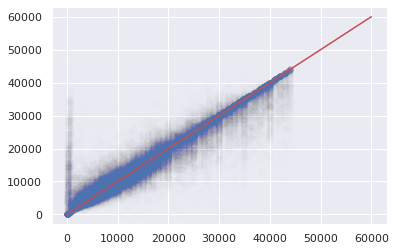

In [326]:
pred_cv_rf = model_cv_rf.predict(X_test)
plt.scatter(x=y_test, y= pred_cv_rf, alpha=0.005)
plt.plot([0, 60000], [0,60000], 'r-')

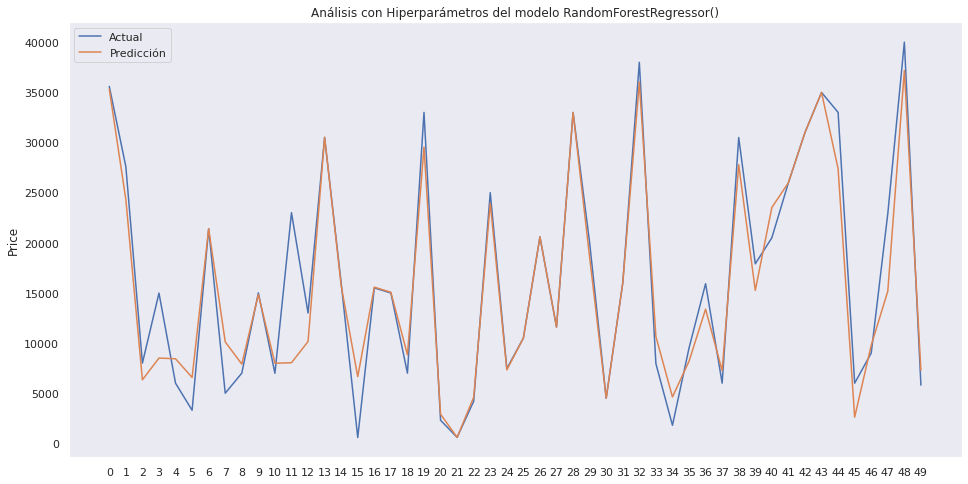

In [327]:
# Modelo: Random Forest Regressor
y_pred=(model_cv_rf.predict(X_test))

number_of_observations=50

x_ax = range(len(y_test[:number_of_observations]))

plt.figure(figsize=(16,8))
plt.plot(x_ax, y_test[:number_of_observations], label="Actual")
plt.plot(x_ax, y_pred[:number_of_observations], label="Predicción")
plt.title("Análisis con Hiperparámetros del modelo RandomForestRegressor()")
plt.ylabel('Price')
plt.xticks(np.arange(number_of_observations))
plt.legend()
plt.grid()
plt.show()

> Análisis con RandomForestRegressor()

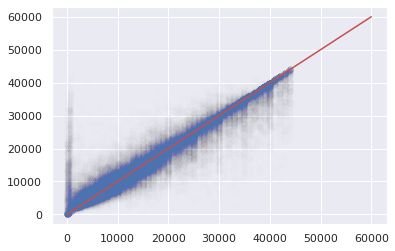

In [328]:
pred_rf = model_rf.predict(X_test)
plt.scatter(x=y_test, y= pred_rf, alpha=0.005)
plt.plot([0, 60000], [0,60000], 'r-')


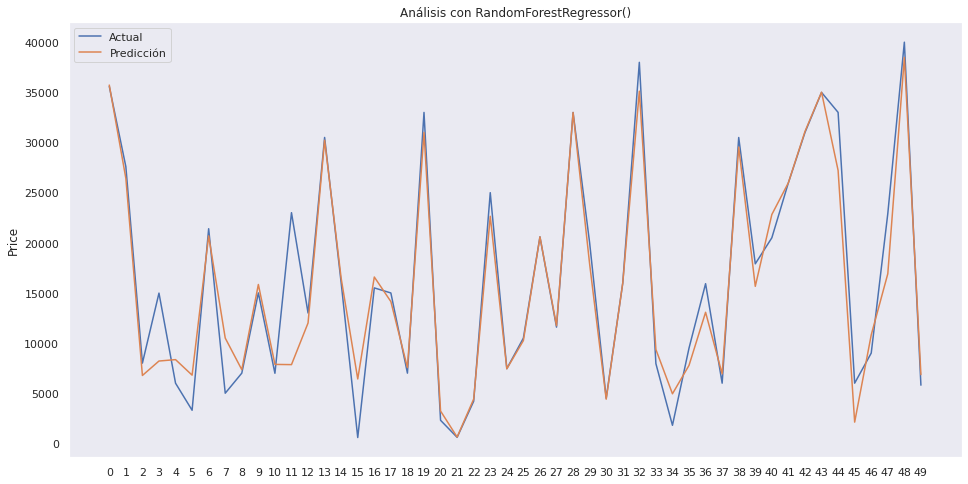

In [329]:
# Modelo: Random Forest Regressor
y_pred=(model_rf.predict(X_test))

number_of_observations=50

x_ax = range(len(y_test[:number_of_observations]))

plt.figure(figsize=(16,8))
plt.plot(x_ax, y_test[:number_of_observations], label="Actual")
plt.plot(x_ax, y_pred[:number_of_observations], label="Predicción")
plt.title("Análisis con RandomForestRegressor()")
plt.ylabel('Price')
plt.xticks(np.arange(number_of_observations))
plt.legend()
plt.grid()
plt.show()

> Análisis con BaggingRegressor()

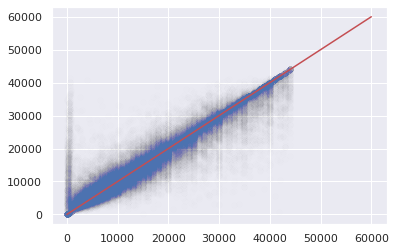

In [330]:
pred_bgr = model_bgr.predict(X_test)
plt.scatter(x = y_test, y= pred_bgr, alpha=0.005)
plt.plot([0, 60000], [0,60000], 'r-')


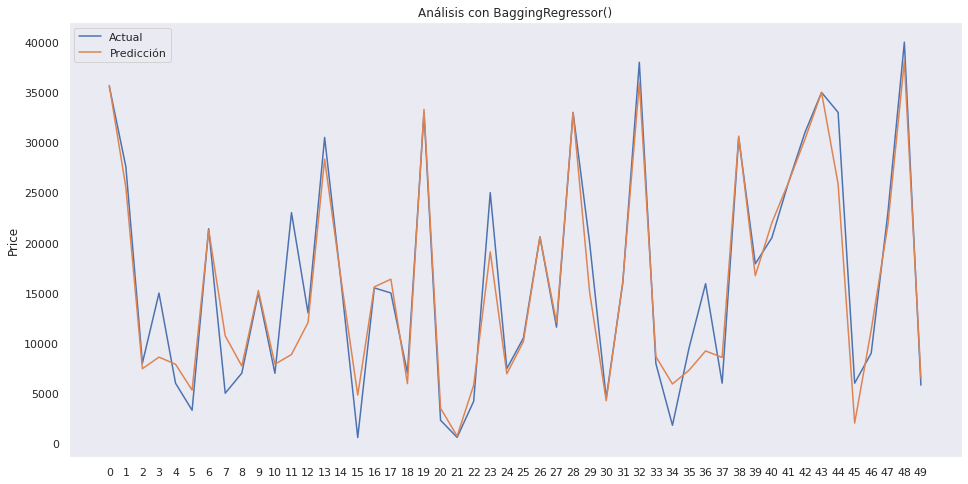

In [331]:
# Modelo: Bagging Regressor
y_pred=(model_bgr.predict(X_test))

number_of_observations=50

x_ax = range(len(y_test[:number_of_observations]))

plt.figure(figsize=(16,8))
plt.plot(x_ax, y_test[:number_of_observations], label="Actual")
plt.plot(x_ax, y_pred[:number_of_observations], label="Predicción")
plt.title("Análisis con BaggingRegressor()")
plt.ylabel('Price')
plt.xticks(np.arange(number_of_observations))
plt.legend()
plt.grid()
plt.show()

> Análisis con HistGradientBoostingRegressor()

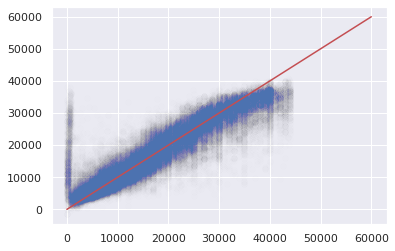

In [332]:
pred_hbr = model_hbr.predict(X_test)
plt.scatter(x=y_test, y= pred_hbr, alpha=0.005)
plt.plot([0, 60000], [0,60000], 'r-')


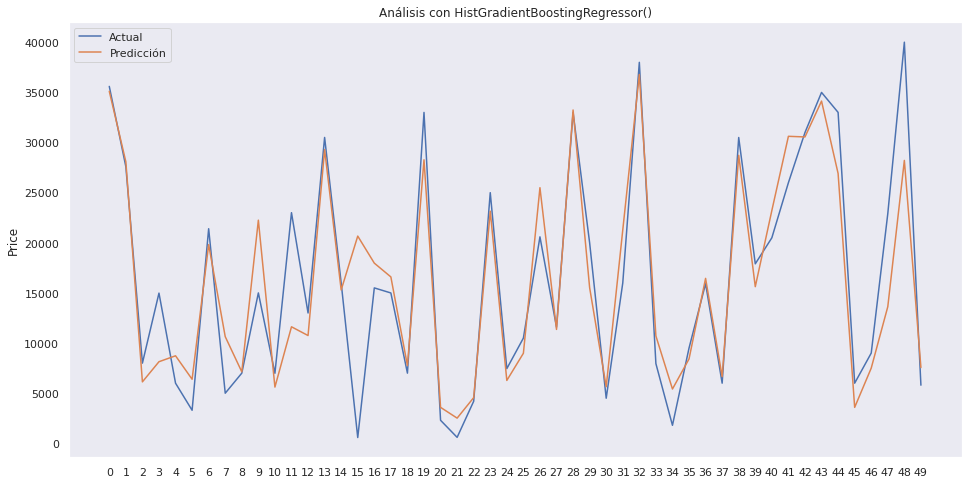

In [333]:
# Modelo: HistGradientBoostingRegressor
y_pred=(model_hbr.predict(X_test))

number_of_observations=50

x_ax = range(len(y_test[:number_of_observations]))

plt.figure(figsize=(16,8))
plt.plot(x_ax, y_test[:number_of_observations], label="Actual")
plt.plot(x_ax, y_pred[:number_of_observations], label="Predicción")
plt.title("Análisis con HistGradientBoostingRegressor()")
plt.ylabel('Price')
plt.xticks(np.arange(number_of_observations))
plt.legend()
plt.grid()
plt.show()

> Análisis con Regresión Lineal()

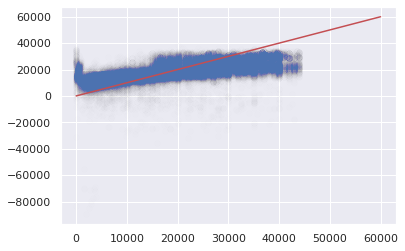

In [334]:
pred_lr = model_lr.predict(X_test)
plt.scatter(x = y_test, y= pred_lr, alpha=0.005)
plt.plot([0, 60000], [0,60000], 'r-')


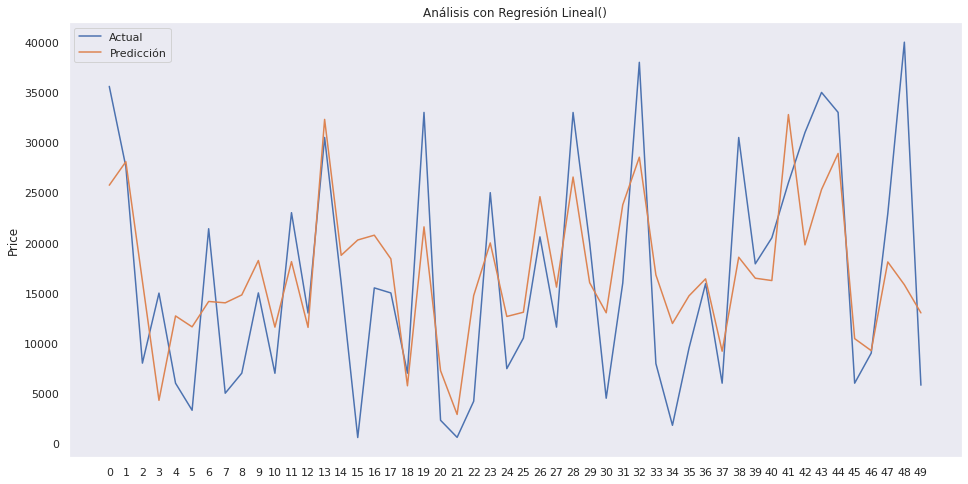

In [335]:
# Modelo: Regresión Lineal
y_pred=(model_lr.predict(X_test))

number_of_observations=50

x_ax = range(len(y_test[:number_of_observations]))

plt.figure(figsize=(16,8))
plt.plot(x_ax, y_test[:number_of_observations], label="Actual")
plt.plot(x_ax, y_pred[:number_of_observations], label="Predicción")
plt.title("Análisis con Regresión Lineal()")
plt.ylabel('Price')
plt.xticks(np.arange(number_of_observations))
plt.legend()
plt.grid()
plt.show()

In [336]:
# Comparamos los modelos de regresión

def score_evaluate(models, X_test, y_test, X_train, y_train): 
    score_test_result = []
    str_models = []

    for name, model in models.items():
        # accuracies = cross_val_score(estimator = model, X= X_train, y= y_train,  cv=10)
        # mean_test_result.append('{:.2f}%' .format(accuracies.mean() * 100))  
        # std_test_result.append('+/- {:.2f}%' .format(accuracies.std() * 100))

        score_test_result.append('{:.2f}%' .format(model.score(X_test,y_test) * 100))  
        str_models.append(str(name))

    return pd.DataFrame({'models':str_models, 'score':score_test_result}) 

In [337]:
models = {
    "Hiperparámetros del modelo RandomForestRegressor()": model_cv_rf,
    "RandomForestRegressor": model_rf, 
    "BaggingRegressor": model_bgr, 
    "HistGradientBoostingRegressor": model_hbr,
    "LinearRegression": model_lr
}
score_evaluate(models, X_test, y_test, X_train, y_train)

models   score
0  Hiperparámetros del modelo RandomForestRegress...  89.08%
1                              RandomForestRegressor  88.09%
2                                   BaggingRegressor  86.78%
3                      HistGradientBoostingRegressor  78.71%
4                                   LinearRegression  38.60%

**Conclusión:** El modelo de aprendizaje automático más eficaz parece ser el modelo **Random Forest Regressor**, que tiene los parámetros de evaluación más bajos. El modelo **Linear Regression** en este ejercicio es el menos indicado para usarse.

## **9.- Predicción**

---



> Definir la función para predecir el precio de un automóvil

In [338]:
def predict(models, year, cylinders, odometer, manufacturer, model, condition, fuel, title_status, transmission, drive, drivetype, paint_color, state):
    name_result = []
    price_result = []
    
    pred = (year, cylinders, odometer, manufacturer, model, condition, fuel, title_status, transmission, drive, drivetype, paint_color, state)
    x = np.array([pred])

    #Convertir los input en LabelEncoder
    le_reg = [np.nan, np.nan, np.nan, le_manufacturer, le_model, le_condition, le_fuel, le_title_status, le_transmission, le_drive, le_type, le_color, le_state]
    
    for i in range(3, len(le_reg)):
      x[:,i] = le_reg[i].transform(x[:,i])
      x
    for name, model in models.items():
      price_est = model.predict(x)
      price_result.append(round(float(str(price_est[0])), 2))
      
      name_result.append(str(name))

    return pd.DataFrame({'models':name_result, 'Precio estimado':price_result}) 

> Predecir el precio de un automóvil 

In [339]:
models = {
    "Hiperparámetros del modelo RandomForestRegressor()": model_cv_rf,
    "RandomForestRegressor": model_rf, 
    "BaggingRegressor": model_bgr, 
    "HistGradientBoostingRegressor": model_hbr
}
predict(models, 2020, 4, 16000.0, 'nissan', 'altima', 'good', 'gas', 'clean', 'automatic', 'fwd', 'sedan', 'black', 'ms')

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(


models  Precio estimado
0  Hiperparámetros del modelo RandomForestRegress...         21769.88
1                              RandomForestRegressor         31158.30
2                                   BaggingRegressor         34010.90
3                      HistGradientBoostingRegressor         22962.96

> Validar la información del dataframe

In [340]:
df[(df.year == 2020) & (df.cylinders == "4 cylinders") & (df.manufacturer == "nissan") & (df.model == "altima") & (df.condition == "good") & (df.fuel == "gas") & (df.title_status == "clean") & (df.transmission == "automatic") & (df.drive == "fwd")  ]

price    year manufacturer   model condition    cylinders fuel  \
127876  24999  2020.0       nissan  altima      good  4 cylinders  gas   
128262  26999  2020.0       nissan  altima      good  4 cylinders  gas   
375205  19983  2020.0       nissan  altima      good  4 cylinders  gas   
398910  14995  2020.0       nissan  altima      good  4 cylinders  gas   

        odometer title_status transmission drive   type paint_color state  
127876   15446.0        clean    automatic   fwd  sedan       black    hi  
128262   13904.0        clean    automatic   fwd  sedan      silver    hi  
375205   22374.0        clean    automatic   fwd  sedan       black    tx  
398910   21816.0        clean    automatic   fwd  other       white    va

> Predecir el precio de un automóvil 

In [341]:
models = {
    "Hiperparámetros del modelo RandomForestRegressor()": model_cv_rf,
    "RandomForestRegressor": model_rf, 
    "BaggingRegressor": model_bgr, 
    "HistGradientBoostingRegressor": model_hbr
}
predict(models, 2020,4,100000.0,'nissan','maxima','good','gas','clean','automatic' ,'rwd','sedan','blue','ca') 

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(


models  Precio estimado
0  Hiperparámetros del modelo RandomForestRegress...         26093.92
1                              RandomForestRegressor         27721.51
2                                   BaggingRegressor         32150.30
3                      HistGradientBoostingRegressor         26629.85

> Validar la información del dataframe

In [342]:
df[(df.year == 2020) & (df.manufacturer == "nissan") & (df.model == "maxima") & (df.condition == "good")]

price    year manufacturer   model condition    cylinders fuel  \
137812  31563  2020.0       nissan  maxima      good  6 cylinders  gas   
210820  29500  2020.0       nissan  maxima      good  6 cylinders  gas   
211258  29500  2020.0       nissan  maxima      good  6 cylinders  gas   
212601  29500  2020.0       nissan  maxima      good  6 cylinders  gas   

        odometer title_status transmission drive   type paint_color state  
137812      75.0        clean    automatic   fwd  sedan         red    id  
210820   15540.0        clean    automatic   fwd  sedan       black    mn  
211258   15540.0        clean    automatic   fwd  sedan       black    mn  
212601   15540.0        clean    automatic   fwd  sedan       black    mn

> Guardar el modelo para su uso posterior

In [343]:
import pickle

pickle.dump(model_cv_rf,open('vehicle_cv_rf_model.sav', 'wb'))

> Recuperar entrenamiento a partir del archivo

In [344]:
vehicle_cv_rf_model = pickle.load(open('vehicle_cv_rf_model.sav','rb'))

vehicle_cv_rf_model

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': ['sqrt', 'log2'],
                          'n_estimators': [10, 50, 100]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [10, 100]}],
             return_train_score=True)

## **10.- Conclusión**
---



### Insights
* Los campos del dataset: 'id', 'url', 'region_url', 'VIN', 'image_url', 'description', 'lat', 'long', 'posting_date', 'size', 'region', 'posting_date', 'posting_date_format' después del análisis se determino que no son aptos para obtener una predicción de precios

* La mayor concentración de precios se encuentra entre $2,500.00 - $44,512.00 USD, 1er y 3er quartial respectivamente

* La transmisión automática es la que contiene más outliers por arriba de los $100,000.00

* Los datos del dataset no existieron rows duplicados, pero si missing values

* 'Good' es la condición más frecuente que se encuentran los automóviles usados, siendo 'New' la menos presente

* '6 Cilinders' tiene mayor presencia en este dataset por lo tanto es directamente proporcional al fuel 'Gas'

* El '4wd' y 'fwd' tienen una presencia similar en el dataset

* 'Sedan' es el tipo de automóvil que más tiene automóviles usados

* 'Silver', 'White' y 'Black' son los colores con mayor presencia en este dataset

* 'Ford', 'Chevrolet' y 'Toyota' tiene los 3 primeros lugares en automóviles usados

* El estado con mayor cantidad de automóviles usados es 'CA' (California)

* Las medidas de tendencia central son: Media = $17,389.72, Mediana = $15,499.00, Moda = $29,990.00, por lo que obtenemos una curva de asimetría positiva

* Al finalizar las pruebas con diferentes métricas, se concluyó que RandomForestRegressor(), BaggingRegressor() y HistGradientBoostingRegressor() son los más óptimos a utilizar para el entrenamiento en este ejemplo





### Conclusión
El modelo de aprendizaje automático más eficaz parece ser el modelo **Random Forest Regressor** con una precisión estimada del 89.3%